# Библиотеки

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
!pip install pymorphy2
import pymorphy2
!pip install langid
import langid
!pip install stop_words
from stop_words import get_stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim import models
import numpy as np
from gensim.models import Doc2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 8.2 MB 50.2 MB/s 
     |████████████████████████████████| 1.9 MB 23.9 MB/s 
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941188 sha256=c62f9bbbf0cb36de87b6d767cf43235224e3c0997f64429118f00ab9b5327e76
  Stored in directory: /root/.cache/pip/wheels/2b/bb/7f/11e4db39477278161e882eadc46fb558949a28b13470fc74b8
Successfully built langid
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=e0a2b6fb9622edd3e2df93316136511411db650eb1f539743a30e24c394d6d59
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [2]:
seed = 42

# Load data



In [3]:
df = pd.read_csv('train.tsv', sep='\t')
df.head()

,title,is_fake
0,Москвичу Владимиру Клутину пришёл счёт за вмеш...,1
1,Агент Кокорина назвал езду по встречке житейск...,0
2,Госдума рассмотрит возможность введения секрет...,1
3,ФАС заблокировала поставку скоростных трамваев...,0
4,Против Навального завели дело о недоносительст...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    5758 non-null   object
 1   is_fake  5758 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.1+ KB


In [5]:
df.describe()

,is_fake
count,5758.000000
mean,0.500000
std,0.500043
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


# Preprocessing

### Список стоп-слов

In [6]:
nltk.download('stopwords')
langid.set_languages(['en','ru'])
stopWordsEn=set().union(get_stop_words('en'), stopwords.words('english'))
stopWordsRu=set().union(get_stop_words('ru'), stopwords.words('russian'))
stopWords=list(set().union(stopWordsEn, stopWordsRu))
print(stopWords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['him', 'всюду', 'сказал', 'theirs', 'won', 'down', "i'd", 'меньше', 'более', 'does', "don't", 'be', 'our', 'многочисленные', 'люди', 'которых', 'здесь', 'myself', 'два', 'before', 'какой', 'одного', 'нет', 'часто', 'такой', 'are', 'всегда', 'мной', 'she', 'другие', 'хотеть', 'ей', 'далеко', 'will', 'времени', 'все', 'нем', 'чуть', "you're", 'одиннадцать', 'чтоб', 'each', 'ее', 'ли', 'тем', 'всех', 'недавно', 'кажется', 'а', 'ни', 'десять', 'действительно', 'тех', 'тою', 'близко', 'бывь', 'рано', 'е', 'твоё', 'into', 'собою', "we'd", 'ними', 'восемнадцатый', 'yourself', 'very', 'говорит', "that's", 'нас', 'одиннадцатый', 'хоть', 'саму', 'тысяч', 'внизу', 'второй', "shouldn't", 'мог', 'во', 'кого', "you've", 'м', 'have', 'лет', 'именно', 'самому', 'какая', 'над', 'один', 'тобой', 'об', 'своих', 'ought', 'чем', 'сама', 'cannot', "doesn't", 'themselves', 'на', 'again', 'вам', 'ве

### Разбиение на токены и убирание стоп-слов

In [7]:
def tokens(df, stopWords):
    """
    The function returns a word-separated title without stop words
    """
    tokens = [word for word in tokenizer.tokenize(df)]
    return [token for token in tokens if not token in stopWords]

tokenizer = RegexpTokenizer(r'\w+')
df['tokens'] = df['title'].apply(tokens, args=(stopWords,))
df.head()

,title,is_fake,tokens
0,Москвичу Владимиру Клутину пришёл счёт за вмеш...,1,"[Москвичу, Владимиру, Клутину, пришёл, счёт, в..."
1,Агент Кокорина назвал езду по встречке житейск...,0,"[Агент, Кокорина, назвал, езду, встречке, жите..."
2,Госдума рассмотрит возможность введения секрет...,1,"[Госдума, рассмотрит, возможность, введения, с..."
3,ФАС заблокировала поставку скоростных трамваев...,0,"[ФАС, заблокировала, поставку, скоростных, тра..."
4,Против Навального завели дело о недоносительст...,1,"[Против, Навального, завели, дело, недоносител..."


### Лемматизация токенов, приведение к нижнему регистру

In [8]:
def tokens_lemm(df):
    """
    The function lemmatizes and lowercases tokens
    """
    lemmedTokens=[]
    for token in df:
        if langid.classify(token)[0]=='en':
            lemmedTokens.append(lemmatizer.lemmatize(token))
        elif langid.classify(token)[0]=='ru':
            lemmedTokens.append(morph.parse(token)[0].normal_form)
    return lemmedTokens

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
morph = pymorphy2.MorphAnalyzer()
df['tokens_lemm'] = df['tokens'].apply(tokens_lemm)
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,title,is_fake,tokens,tokens_lemm
0,Москвичу Владимиру Клутину пришёл счёт за вмеш...,1,"[Москвичу, Владимиру, Клутину, пришёл, счёт, в...","[москвич, владимир, клутина, прийти, счёт, вме..."
1,Агент Кокорина назвал езду по встречке житейск...,0,"[Агент, Кокорина, назвал, езду, встречке, жите...","[агент, кокорин, назвать, езда, встречка, жите..."
2,Госдума рассмотрит возможность введения секрет...,1,"[Госдума, рассмотрит, возможность, введения, с...","[госдума, рассмотреть, возможность, введение, ..."
3,ФАС заблокировала поставку скоростных трамваев...,0,"[ФАС, заблокировала, поставку, скоростных, тра...","[фас, заблокировать, поставка, скоростной, тра..."
4,Против Навального завели дело о недоносительст...,1,"[Против, Навального, завели, дело, недоносител...","[против, навальный, завести, дело, недоносител..."


# EDA
* Проверить сбалансированность классов
* Оценить длинну заголовков новостей
* Оценить количество слов в заголовке новости (со стоп-словами и без стоп-слов)
* Оценить наличие собственных имен в заголовке
* Оценить наличие латинского текста в заголовке
* Оценить наличие специальных символов/пунктуации (!, ?, "",)


### Проверка сбалансированности классов

In [9]:
df[df['is_fake']==1].shape, df[df['is_fake']==0].shape

((2879, 4), (2879, 4))

Классы сбалансированы

## Особенности синтаксиса, пунктуации и морфологии

### Длина заголовков новостей 

In [10]:
df['len_title'] = df['title'].apply(lambda x: len(x))

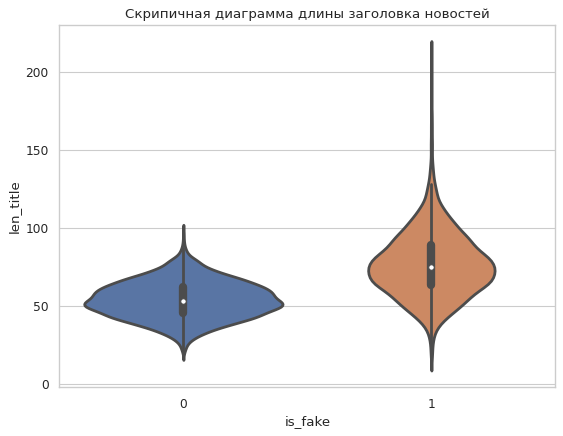

In [11]:
sns.set_theme(style="whitegrid")
fig = pyplot.figure(figsize=(8, 6), dpi=80)
sns.violinplot(x='is_fake', y='len_title', data=df, linewidth=2.5)

pyplot.title('Cкрипичная диаграмма длины заголовка новостей')
pyplot.show()


In [12]:
false_news = df['len_title'][df['is_fake']==1]
true_news = df['len_title'][df['is_fake']==0]
print(f'Средняя длина заголовка новости: Правдивая новость - {true_news.mean()}, Фейк-новость - {false_news.mean()}')
print(f'СКО заголовка новости:           Правдивая новость - {true_news.std()}, Фейк-новость - {false_news.std()}')
print(f'Минимальный заголовок новости:   Правдивая новость - {true_news.min()}, Фейк-новость - {false_news.min()}')
print(f'Максимальный заголовок новости:  Правдивая новость - {true_news.max()}, Фейк-новость - {false_news.max()}')

Средняя длина заголовка новости: Правдивая новость - 53.79854116012504, Фейк-новость - 76.45467176102814
СКО заголовка новости:           Правдивая новость - 11.827271372310323, Фейк-новость - 21.241585299282384
Минимальный заголовок новости:   Правдивая новость - 20, Фейк-новость - 17
Максимальный заголовок новости:  Правдивая новость - 97, Фейк-новость - 211


Наблюдается различие в распределении длины правдивых и фейковых новостей. 

* Размах длины заголовков фейк-новостей больше, чем у правдивых
* Фэйк-заголовки в среднем длинее правдивых заголовков новостей

Этим можно воспользоваться

 ### Количество слов в заголовке новости (без стоп-слов)

In [13]:
df['num_token'] = df['tokens'].apply(lambda x: len(x))

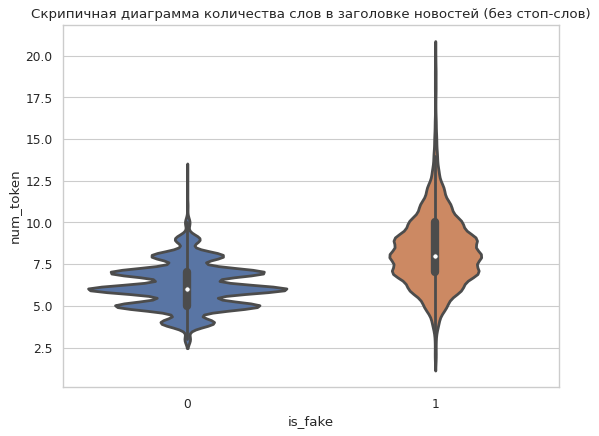

In [14]:
sns.set_theme(style="whitegrid")
fig = pyplot.figure(figsize=(8, 6), dpi=80)
sns.violinplot(x='is_fake', y='num_token', data=df, linewidth=2.5)

pyplot.title('Cкрипичная диаграмма количества слов в заголовке новостей (без стоп-слов)')
pyplot.show()

In [15]:
false_news = df['num_token'][df['is_fake']==1]
true_news = df['num_token'][df['is_fake']==0]
print(f'Среднее количество слов заголовка новости:       Правдивая новость - {true_news.mean()}, Фейк-новость - {false_news.mean()}')
print(f'СКО количества слов заголовка новости:           Правдивая новость - {true_news.std()}, Фейк-новость - {false_news.std()}')
print(f'Минимальное количество слов заголовка новости:   Правдивая новость - {true_news.min()}, Фейк-новость - {false_news.min()}')
print(f'Максимальное количество слов заголовка новости:  Правдивая новость - {true_news.max()}, Фейк-новость - {false_news.max()}')

Среднее количество слов заголовка новости:       Правдивая новость - 6.198332754428621, Фейк-новость - 8.33344911427579
СКО количества слов заголовка новости:           Правдивая новость - 1.3259257975905598, Фейк-новость - 2.16741046420029
Минимальное количество слов заголовка новости:   Правдивая новость - 3, Фейк-новость - 2
Максимальное количество слов заголовка новости:  Правдивая новость - 13, Фейк-новость - 20


Различия в распределениях схожи с распределением длины заголовков правдивых и фейковых новостей. При использовании в качестве признака количество слов в заголовке и длины заголовка, скорее всего, будет наблюдаться мультиколлинеарный эффект.

### Аббревиатуры

In [16]:
def abbreviation(df):
    """
    Function looks for abbreviations
    """
    for word in df:
        if word.isupper():
            return 1
    return 0

df['abbreviation'] = df['tokens'].apply(abbreviation)

<Figure size 640x480 with 0 Axes>

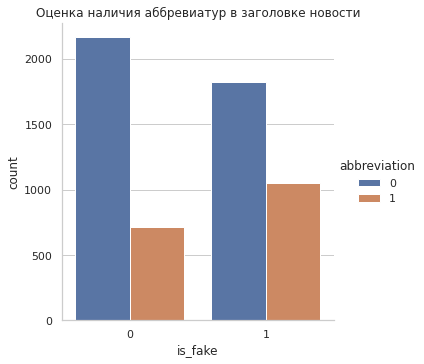

In [17]:
sns.set_theme(style="whitegrid")
fig = pyplot.figure(figsize=(8, 6), dpi=80)
sns.catplot(x="is_fake", hue="abbreviation", kind='count', data=df)

pyplot.title('Оценка наличия аббревиатур в заголовке новости')
pyplot.show()

Количество аббревиатур в фейковых заголовках встречается чаще, чем в правдивых.

Этим можно воспользоваться

### Имена в заголовке


In [18]:
def name_in_title(df, prob_thresh):
    for word in nltk.word_tokenize(df):
        for p in morph.parse(word):
            if 'Name' in p.tag and p.score >= prob_thresh:
                return 1
    return 0

prob_thresh = 0.6
nltk.download('punkt')
morph = pymorphy2.MorphAnalyzer()
df['name_in_title'] = df['title'].apply(name_in_title, args=(prob_thresh,))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<Figure size 640x480 with 0 Axes>

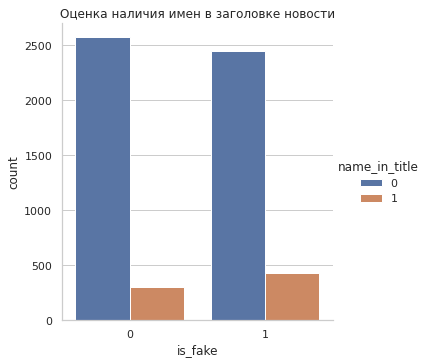

In [19]:
sns.set_theme(style="whitegrid")
fig = pyplot.figure(figsize=(8, 6), dpi=80)
sns.catplot(x="is_fake", hue="name_in_title", kind='count', data=df)

pyplot.title('Оценка наличия имен в заголовке новости')
pyplot.show()

### Наличие латиницы в заголовке и чисел
Based on https://habr.com/ru/post/599513/

In [100]:
def num_english_words(df):
    tokens = [word for word in tokenizer.tokenize(df)]
    count_english_words = 0
    for token in tokens:
        if langid.classify(token)[0]=='en':
            count_english_words +=1
    return count_english_words

tokenizer = RegexpTokenizer(r'\w+')
langid.set_languages(['en','ru'])
df['num_english_words'] = df['title'].apply(num_english_words)

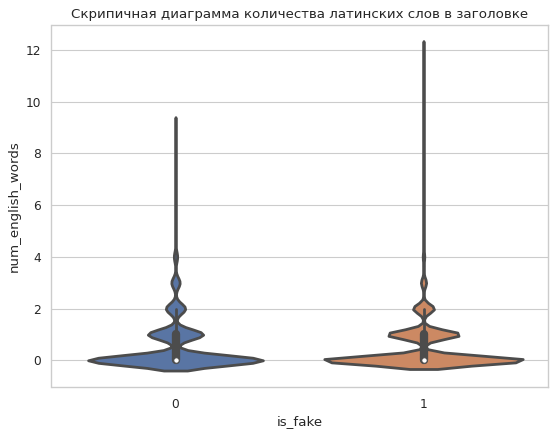

In [104]:
sns.set_theme(style="whitegrid")
fig = pyplot.figure(figsize=(8, 6), dpi=80)
sns.violinplot(x='is_fake', y='num_english_words', data=df, linewidth=2.5)

pyplot.title('Cкрипичная диаграмма количества латинских слов в заголовке')
pyplot.show()

Различий в распределении практически нет. Этот признак будет малополезен при создании модели

### Наличие специальных символов/пунктуации (!, ?, "" и т.п.)



#### Заголовок с восклицанием

In [22]:
df['exclamation_mark'] = df['title'].apply(lambda x: 1 if '!' in x else 0)
sum(df['exclamation_mark'])

16

In [23]:
df[['title', 'is_fake']][df['exclamation_mark']==1]

,title,is_fake
570,«Нам бы такого президента!»: американцы вырази...,1
1143,Дорогой Джон! Пора перебираться в Россию!,1
1376,Дмитрий Песков губернатору Воронежской области...,1
1727,"В Самаре принудительно усыпили попугая, выкрик...",1
1796,Во Владивостоке неизвестные похитили лидера ме...,1
2331,Дмитрий Рогозин в День космонавтики крикнет «П...,1
2482,Модель с плаката We Can Do It! умерла в возрас...,0
2533,Роскосмос получит 600 миллиардов рублей на про...,1
2673,"Примем меры, если он не откажется от премии!: ...",1
2906,"«Спокойной ночи, малыши!» покажут специальный ...",1


#### Вопросительный знак

In [24]:
df['question_mark'] = df['title'].apply(lambda x: 1 if '?' in x else 0)
sum(df['question_mark'])

11

In [25]:
df[['title', 'is_fake']][df['question_mark']==1]

,title,is_fake
377,Новым ведущим Что? Где? Когда? станет Даня Мил...,1
1419,«Зачем народу столько сайтов?»: Минцифры Росси...,1
2624,А он по-вашему не заслужил?: Симоньян посовето...,1
2916,У нас знаете сколько больных каждый день?: в о...,1
3131,“А государство что с этого получит?”: Чубайс н...,1
3687,Константин Эрнст: «А Украина тоже участвует в ...,1
3740,Ведущий “Что? Где? Когда?” попытался сжечь зда...,1
4524,"Михаил Дегтярёв: «Зачем вам бензин, когда есть...",1
4868,"Нравится, когда американцы из этой штуки облуч...",1
5025,«Ну кто так стреляет?!»: Юрий Лоза прокомменти...,1


#### Кавычки

In [26]:
df['quotes'] = df['title'].apply(lambda x: 1 if '«' and '»' in x else 0)
sum(df['quotes'])

888

<Figure size 640x480 with 0 Axes>

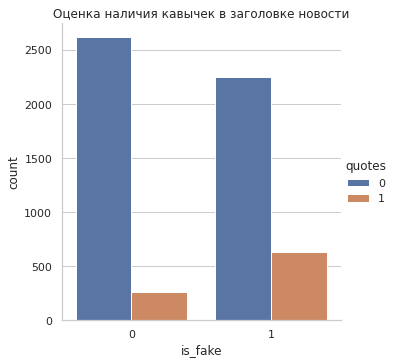

In [27]:
sns.set_theme(style="whitegrid")
fig = pyplot.figure(figsize=(8, 6), dpi=80)
sns.catplot(x="is_fake", hue="quotes", kind='count', data=df)

pyplot.title('Оценка наличия кавычек в заголовке новости')
pyplot.show()

Фейковые новости чаще содержаn кавычки.

В качестве гипотезы - скорее всего это прямая речь, взятая в кавычки.

#### Двоеточие

In [28]:
df['colon'] = df['title'].apply(lambda x: 1 if ':' in x else 0)
sum(df['colon'])

309

<Figure size 640x480 with 0 Axes>

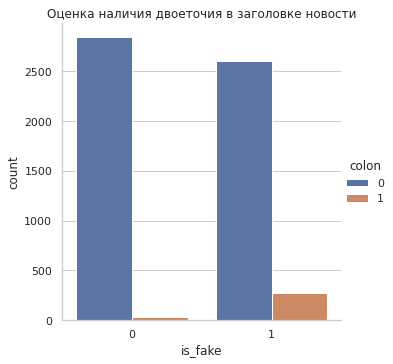

In [29]:
sns.set_theme(style="whitegrid")
fig = pyplot.figure(figsize=(8, 6), dpi=80)
sns.catplot(x="is_fake", hue="colon", kind='count', data=df)

pyplot.title('Оценка наличия двоеточия в заголовке новости')
pyplot.show()

Наличие спецсимволов и пунктуации позволяет заметить разницу между фейковым и правдивым заголовком.

Этим можно воспользоваться

### Части речи в заголовке

#### Существительное

In [30]:
def num_nouns(df):
    cnt =0
    for word in df:
        for p in morph.parse(word):
            if 'NOUN' in p.tag:
                cnt += 1
    return cnt

nltk.download('punkt')
morph = pymorphy2.MorphAnalyzer()
df['num_nouns'] = df['tokens_lemm'].apply(num_nouns)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


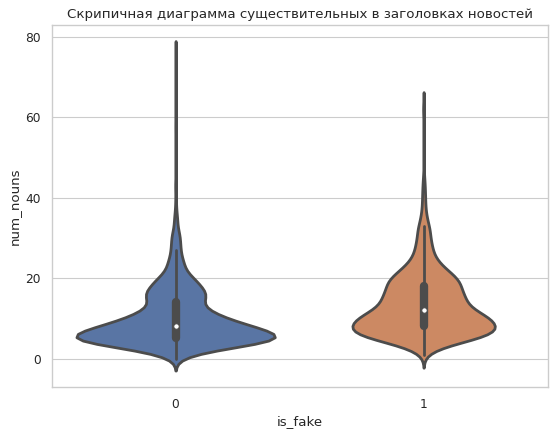

In [31]:
sns.set_theme(style="whitegrid")
fig = pyplot.figure(figsize=(8, 6), dpi=80)
sns.violinplot(x='is_fake', y='num_nouns', data=df, linewidth=2.5)

pyplot.title('Cкрипичная диаграмма существительных в заголовках новостей')
pyplot.show()

#### Глагол

In [32]:
def num_verbs(df):
    cnt =0
    for word in df:
        for p in morph.parse(word):
            if 'INFN' in p.tag:
                cnt += 1
    return cnt

nltk.download('punkt')
morph = pymorphy2.MorphAnalyzer()
df['num_verbs'] = df['tokens_lemm'].apply(num_verbs)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


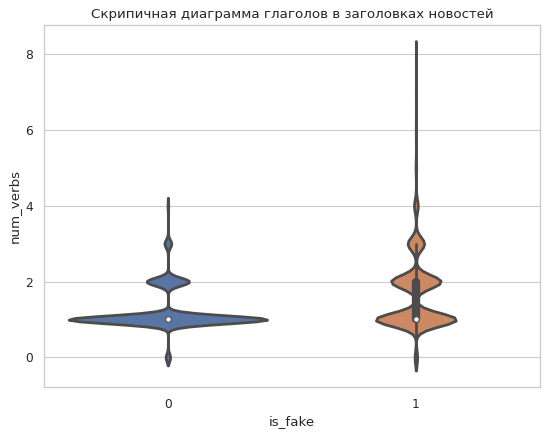

In [33]:
sns.set_theme(style="whitegrid")
fig = pyplot.figure(figsize=(8, 6), dpi=80)
sns.violinplot(x='is_fake', y='num_verbs', data=df, linewidth=2.5)

pyplot.title('Cкрипичная диаграмма глаголов в заголовках новостей')
pyplot.show()


#### Прилагательное

In [34]:
def num_adjf(df):
    cnt =0
    for word in df:
        for p in morph.parse(word):
            if ('ADJF' in p.tag) or ('ADJS' in p.tag):
                cnt += 1
    return cnt

nltk.download('punkt')
morph = pymorphy2.MorphAnalyzer()
df['num_adjf'] = df['tokens_lemm'].apply(num_adjf)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


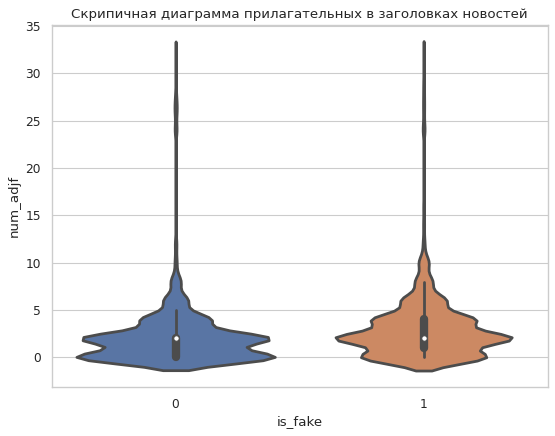

In [35]:
sns.set_theme(style="whitegrid")
fig = pyplot.figure(figsize=(8, 6), dpi=80)
sns.violinplot(x='is_fake', y='num_adjf', data=df, linewidth=2.5)

pyplot.title('Cкрипичная диаграмма прилагательных в заголовках новостей')
pyplot.show()

Различия по частям речи в заголовках новостей малы.

Использование этих признаков будет мало полезно

# Feature engineering

По результатам EDA зададим первые признаки для модели

In [36]:
eda_features = df[['len_title', 'abbreviation', 'exclamation_mark', 
                   'question_mark', 'quotes', 'colon', 'name_in_title',
                   ]]

Все признаки бинарные (0, 1) или численные дополнительные преобразования не требуются

## Векторизация

### TF-IDF

In [37]:
df['title_lemm'] = pd.DataFrame([[' '.join(x)] for x in df['tokens_lemm']])

In [38]:
tfidf = TfidfVectorizer()
tfidf_features = pd.DataFrame(tfidf.fit_transform(df['title_lemm']).toarray(), 
                            columns=tfidf.get_feature_names())
tfidf_features.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,02м,08м,10,100,1000,101,1079,11,...,ярош,ярцев,ясный,ястреб,яхта,яценюк,яшин,ящик,ёлка,ёршик
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Doc2Vec

Based on https://habr.com/ru/post/599513/

In [39]:
textCollDictionary = corpora.Dictionary(df['tokens_lemm'].to_list())
textCorpus = [textCollDictionary.doc2bow(doc) for doc in df['tokens_lemm'].to_list()]

d2vSize=80
d2vCorpus= [models.doc2vec.TaggedDocument(text,[k]) for k,text in enumerate(df['tokens_lemm'])]
d2vModel=Doc2Vec(vector_size=d2vSize, min_count=1, epochs=10, dm=1)
d2vModel.build_vocab(d2vCorpus)
d2vModel.train(d2vCorpus, total_examples=d2vModel.corpus_count, epochs=d2vModel.epochs)

textD2vMtx=np.zeros(shape=(len(textCorpus), d2vSize),dtype=float)
for docId in range(len(d2vCorpus)):
    doc2vector=d2vModel.infer_vector(d2vCorpus[docId].words)
    textD2vMtx[docId,:]=doc2vector

In [40]:
d2v_features = pd.DataFrame(textD2vMtx)
d2v_features.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.013691,0.012305,0.018154,0.006298,0.000974,0.002139,0.011950,0.010717,0.002229,-0.016198,...,0.000289,-0.009514,-0.002251,-0.005244,-0.009666,-0.030108,-0.004135,-0.003607,-0.014325,-0.003848
1,0.022118,0.008151,0.025419,0.011727,0.005931,0.004620,0.007553,0.002179,0.003463,-0.014898,...,0.003200,-0.008919,0.002645,-0.001757,-0.003928,-0.035491,-0.006046,0.000813,-0.007068,0.003506
2,0.020129,0.018561,0.034995,0.006572,0.003037,0.005529,0.013119,0.004331,0.000368,-0.023028,...,-0.004867,-0.016147,0.002253,-0.011236,-0.005420,-0.047979,-0.017046,-0.002183,-0.017403,-0.005162
3,0.011319,0.003645,0.014043,0.005835,0.005002,0.003085,0.003702,0.008378,-0.006451,-0.017119,...,-0.004383,-0.005146,-0.002122,-0.000534,-0.006351,-0.021090,-0.002362,0.001974,-0.007994,-0.001024
4,0.019310,0.004922,0.021755,0.006279,-0.001599,-0.000252,0.002077,-0.000617,-0.003362,-0.013437,...,0.001496,-0.013523,0.006531,-0.005641,-0.011714,-0.031945,-0.008495,-0.007987,-0.009916,-0.000087


### LDA  (Latent Dirichlet allocation)

Based on https://habr.com/ru/post/599513/

In [41]:
textCollDictionary = corpora.Dictionary(df['tokens_lemm'].to_list())
textCorpus = [textCollDictionary.doc2bow(doc) for doc in df['tokens_lemm'].to_list()]

nTopics=80
ldamodel=models.ldamodel.LdaModel(textCorpus,  id2word=textCollDictionary, num_topics=nTopics, passes=10)

textTopicsMtx=np.zeros(shape=(len(textCorpus),nTopics),dtype=float)
for k in range(len(textCorpus)): ## make the matrix of docs to topic vectors
    for tpcId,tpcProb in ldamodel.get_document_topics(textCorpus[k]):
        textTopicsMtx[k,tpcId]=tpcProb

In [42]:
lda_features = pd.DataFrame(textTopicsMtx)
lda_features.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.144643,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.146183,0.0,0.0,0.0,...,0.000000,0.0,0.146241,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Кластерный анализ
Для кластеризации используем полученные векторизации заголовков новостей

In [43]:
tfidf_clastering = tfidf_features
d2v_clastering = d2v_features
lda_clastering = lda_features
data_clustering = {'tfidf_clastering': tfidf_clastering, 
                   'd2v_clastering': d2v_clastering, 
                   'lda_clastering': lda_clastering}

### Понижение размерности

Для ускорения и наглядности анализа данных понизим размерность до 2D

In [44]:
df_color = df['is_fake'].apply(lambda x: 'yellow' if x==0 else 'black')

#### tsne 2D

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


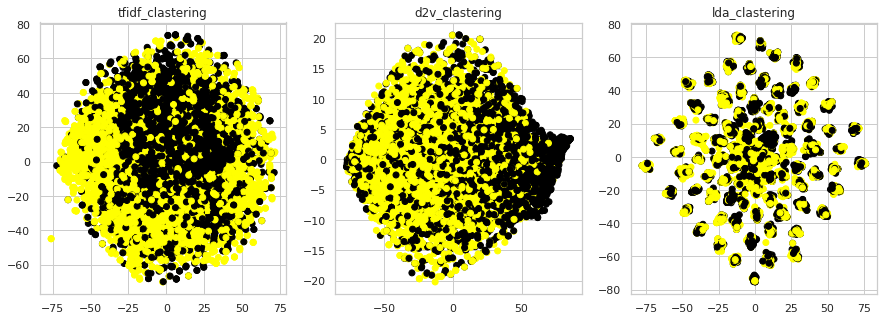

In [45]:
tsne_2d = {}
fig, ax = pyplot.subplots(1, len(data_clustering), figsize=(15, 5))
for i, data in enumerate(data_clustering.items()):
    tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto').fit_transform(data[1])
    tsne_2d['tsne2d_'+data[0]] = tsne
    ax[i].scatter(tsne[:,0],tsne[:,1], c=df_color)
    ax[i].set_title(data[0])
pyplot.show()

In [46]:
tsne_2d_clustering = tsne_2d

#### pca 2D

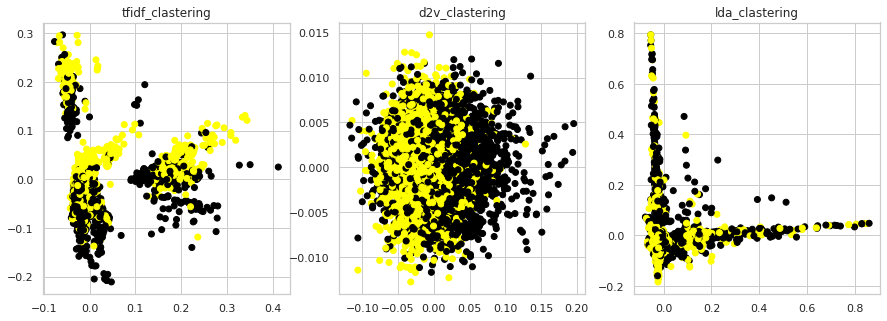

In [47]:
pca_2d = {}
fig, ax = pyplot.subplots(1, len(data_clustering), figsize=(15, 5))
for i, data in enumerate(data_clustering.items()):
    pca = PCA(n_components=2, random_state=seed).fit_transform(data[1])
    pca_2d['pca2d_'+data[0]] = pca
    ax[i].scatter(pca[:,0], pca[:,1], c=df_color)
    ax[i].set_title(data[0])
pyplot.show()

In [48]:
pca_2d_clustering = pca_2d

### DBSCAN
По плотности, исходя из изображений, имеет смысл кластеризовать
* tsne2d_lda_clastering
* pca2d_tfidf_clastering

Подберем значение eps, определив min_samples = 50 (1% от выборки)

#### tsne 2D

In [49]:
min_samples = 50
clusters = 5  # Отсекаем кластеризацию при кол-ве кластеров меньше данного значения
coef = 1  # Коэффициент множитель при поиске eps
eps_clasters_dbscan = []
for i in range(1, 50):
    clusters_dbscan = DBSCAN(eps=i*coef, min_samples=min_samples).fit(tsne_2d_clustering['tsne2d_lda_clastering'])
    if len(np.unique(clusters_dbscan.labels_))>clusters:
        eps_clasters_dbscan.append((i, clusters_dbscan.labels_))


Посмотрим полученные кластеры

In [50]:
for cnt, el in enumerate(eps_clasters_dbscan):
   number_clusters, count_values = np.unique(el[1], return_counts=True)
   print(f'Элемент списка {cnt}, eps = {el[0]*coef}, кол-во кластеров {len(number_clusters)}\nСтруктура кластеров:\n{count_values}')

Элемент списка 0, eps = 3, кол-во кластеров 78
Структура кластеров:
[571  65  73  90  79  68  67  92  59  66  62  81  59  61  73  59  56  64
  59  81  93  71  69  55  63  53  64  67  53  82  76  65  58  73  66 114
  62  58  56  70  69  62  54  63  57  61  82  72  69  61  81  62  54  72
  76  63  73  82  99  55  62  71  62  54  67  59  91  51  78 101  57  55
  65  56  52  52  53  52]
Элемент списка 1, eps = 4, кол-во кластеров 79
Структура кластеров:
[209  57  68  73  59  94  68  90  79  68  59  81  56 119  53  78  63  67
  54  56  62  73  57  66  83  59  61  61 121  59  76  88  65  71  74  58
  77 107  54  61  61  76  64  60  54  55  62  76  90  78  95  69  72  69
  59  55  72  63  78  63  65  82  58  53  87  76  91  63  66  73  62 189
  67  57  72  80  57  55  50]
Элемент списка 2, eps = 5, кол-во кластеров 66
Структура кластеров:
[ 146   57   68   78   73 1031   59   94   55   68  135   92   79   82
   68   59   59   53   56  121   73   63   67   54   56   62   78   61
   73   57   6

Выберем для оценки кластерезацию с eps=3 она содержит максимальное количество обнаруженных кластеров и достатоно равномерное колиство элементов в кластере, что соответствует приведенному выше 2D графику. Построим график кластеризации чтобы убедиться в корректности наших предположений

In [51]:
clusters_dbscan = DBSCAN(eps=3, min_samples=min_samples).fit(tsne_2d_clustering['tsne2d_lda_clastering'])

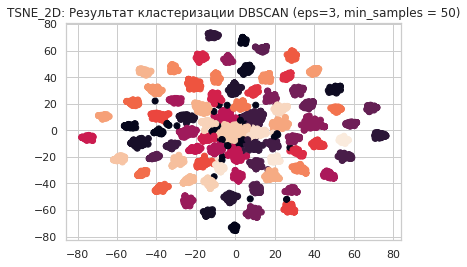

In [52]:
pyplot.scatter(tsne_2d_clustering['tsne2d_lda_clastering'][:, 0], tsne_2d_clustering['tsne2d_lda_clastering'][:, 1], 
               c=eps_clasters_dbscan[1][1])
pyplot.title('TSNE_2D: Результат кластеризации DBSCAN (eps=3, min_samples = 50)')
pyplot.show()

Оценим распределение фейковых и правдивых заголовков по кластерам

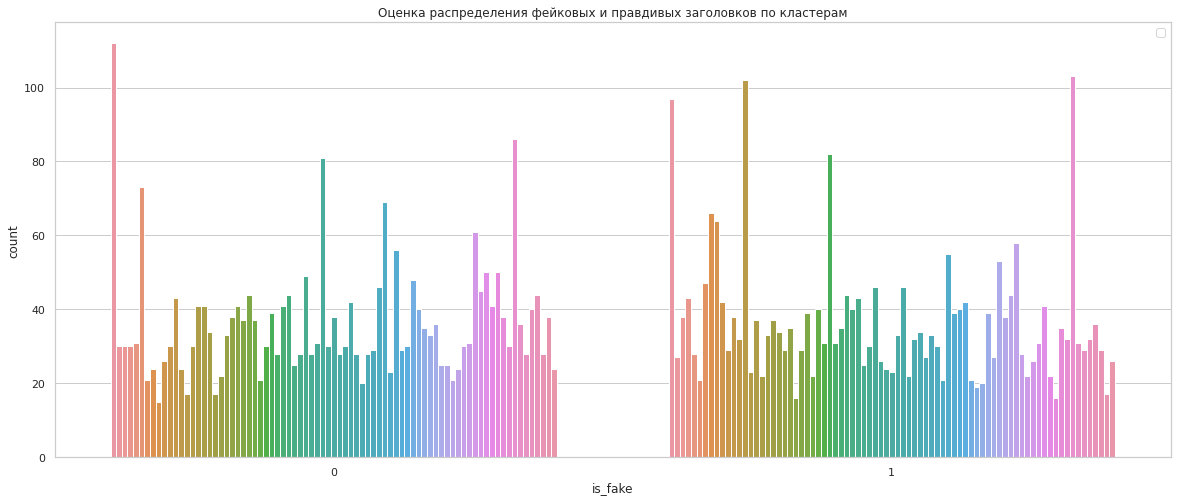

In [53]:
df['tsne2d_lda_clastering'] = eps_clasters_dbscan[1][1]

fig = pyplot.figure(figsize=(20, 8))
sns.countplot(x="is_fake", hue='tsne2d_lda_clastering', data=df )
pyplot.legend([])
pyplot.title('Оценка распределения фейковых и правдивых заголовков по кластерам')
pyplot.show()

На первый взгляд полезность признака не очевидна, имеет смысл в качестве эксперимента попробовать добавить в набор признаков и испытать при моделировании

#### pca 2D

In [54]:
min_samples = 50
clusters = 1  # Отсекаем кластеризацию при кол-ве кластеров меньше данного значения
coef = 0.01  # Коэффициент множитель при поиске eps
eps_clasters_dbscan = []
for i in range(1, 50):
    clusters_dbscan = DBSCAN(eps=i*coef, min_samples=min_samples).fit(pca_2d_clustering['pca2d_tfidf_clastering'])
    if len(np.unique(clusters_dbscan.labels_))>clusters:
        eps_clasters_dbscan.append((i, clusters_dbscan.labels_))

Посмотрим полученные кластеры

In [55]:
for cnt, el in enumerate(eps_clasters_dbscan):
   number_clusters, count_values = np.unique(el[1], return_counts=True)
   print(f'Элемент списка {cnt}, eps = {el[0]*coef}, кол-во кластеров {len(number_clusters)}\nСтруктура кластеров:\n{count_values}')

Элемент списка 0, eps = 0.01, кол-во кластеров 3
Структура кластеров:
[ 880 4669  209]
Элемент списка 1, eps = 0.02, кол-во кластеров 4
Структура кластеров:
[ 288 4834  380  256]
Элемент списка 2, eps = 0.03, кол-во кластеров 4
Структура кластеров:
[ 132 4900  455  271]
Элемент списка 3, eps = 0.04, кол-во кластеров 4
Структура кластеров:
[  69 4925  276  488]
Элемент списка 4, eps = 0.05, кол-во кластеров 2
Структура кластеров:
[  38 5720]
Элемент списка 5, eps = 0.06, кол-во кластеров 2
Структура кластеров:
[  14 5744]
Элемент списка 6, eps = 0.07, кол-во кластеров 2
Структура кластеров:
[   9 5749]
Элемент списка 7, eps = 0.08, кол-во кластеров 2
Структура кластеров:
[   2 5756]
Элемент списка 8, eps = 0.09, кол-во кластеров 2
Структура кластеров:
[   2 5756]
Элемент списка 9, eps = 0.1, кол-во кластеров 2
Структура кластеров:
[   1 5757]


Выберем для оценки кластерезацию с eps=0.04 она содержит различимые глазами 3 кластера (и 1 не вошедший в кластер) на графике pca 2D приведенном выше. Построим график кластеризации чтобы убедиться в корректности наших предположений


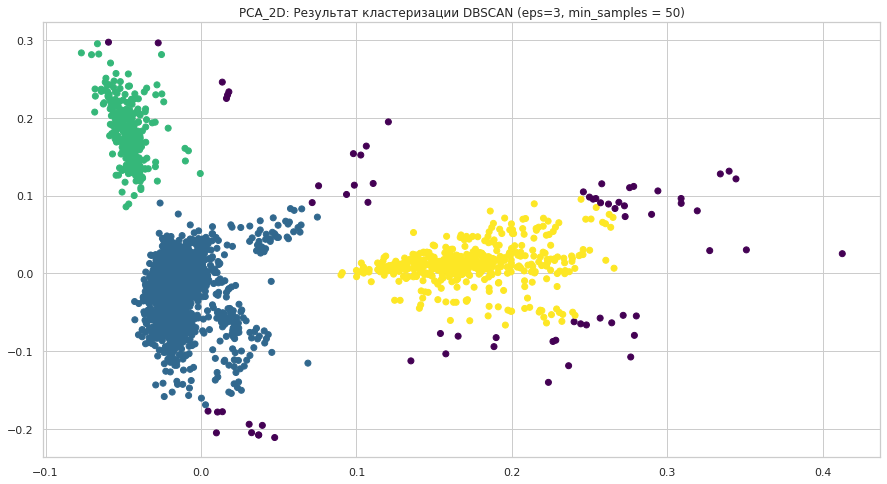

In [56]:
fig = pyplot.figure(figsize=(15, 8))
pyplot.scatter(pca_2d_clustering['pca2d_tfidf_clastering'][:, 0], pca_2d_clustering['pca2d_tfidf_clastering'][:, 1], 
               c=eps_clasters_dbscan[3][1], cmap='viridis')
pyplot.title('PCA_2D: Результат кластеризации DBSCAN (eps=3, min_samples = 50)')
pyplot.show()

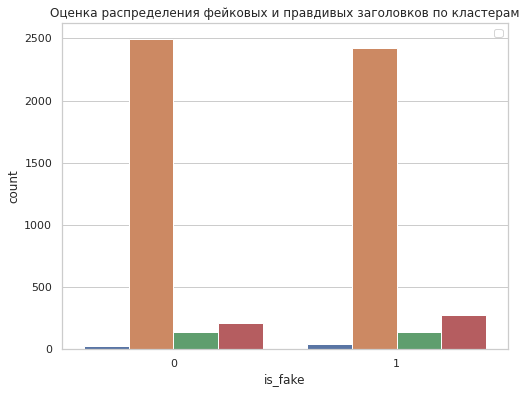

In [57]:
df['pca2d_tfidf_clastering'] = eps_clasters_dbscan[3][1]

fig = pyplot.figure(figsize=(8, 6))
sns.countplot(x="is_fake", hue='pca2d_tfidf_clastering', data=df )
pyplot.legend([])
pyplot.title('Оценка распределения фейковых и правдивых заголовков по кластерам')
pyplot.show()

Различий в распределении практически нет. Этот признак будет малополезен при создании модели

### Kmeans
Количество кластеров будем определять методом "локтя"

#### tsne 2D

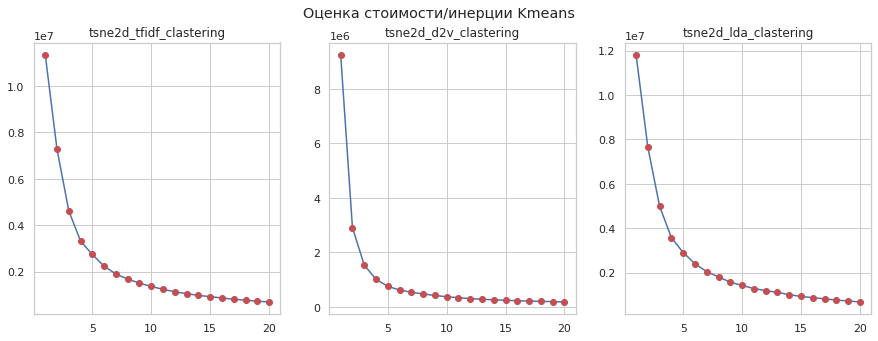

In [58]:
n_clusters = 20

fig, ax = pyplot.subplots(1, len(data_clustering), figsize=(15, 5))
fig.suptitle('Оценка стоимости/инерции Kmeans')
for i, data in enumerate(tsne_2d_clustering.items()):
    k_inertia = []
    for clusters in range(1, n_clusters+1):
        kmeans = KMeans(n_clusters=clusters, random_state=seed).fit(data[1])
        k_inertia.append(kmeans.inertia_)
    ax[i].plot(range(1, n_clusters+1), k_inertia, label=data[0])
    ax[i].plot(range(1, n_clusters+1), k_inertia, 'ro')
    ax[i].set_title(data[0])
pyplot.show()

Для разбиения на кластеры выберем 4 и 5 кластера на всех трех представлениях

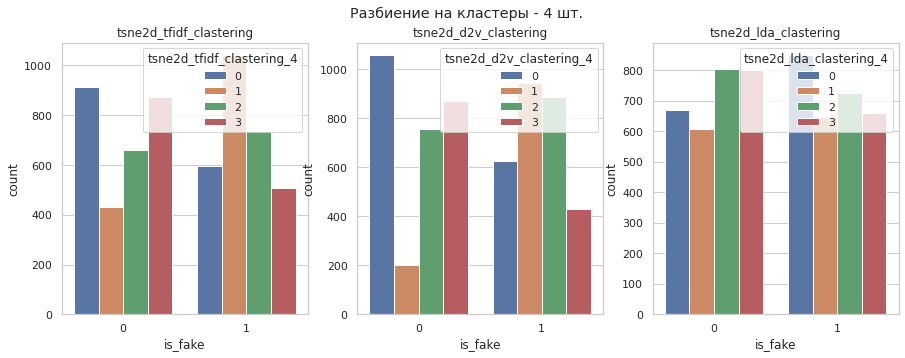

In [59]:
n_clusters = 4
fig, ax = pyplot.subplots(1, len(data_clustering), figsize=(15, 5))
fig.suptitle(f'Разбиение на кластеры - {n_clusters} шт.')
for i, data in enumerate(tsne_2d_clustering.items()):
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed).fit(data[1])
    df[data[0]+'_'+str(n_clusters)] = kmeans.labels_
    sns.countplot(ax=ax[i], x="is_fake", hue=data[0]+'_'+str(n_clusters), data=df)
    ax[i].set_title(data[0])
pyplot.show()

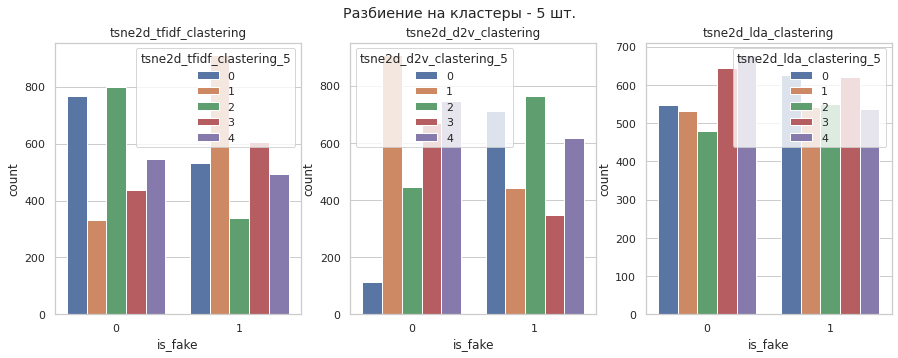

In [60]:
n_clusters = 5
fig, ax = pyplot.subplots(1, len(data_clustering), figsize=(15, 5))
fig.suptitle(f'Разбиение на кластеры - {n_clusters} шт.')
for i, data in enumerate(tsne_2d_clustering.items()):
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed).fit(data[1])
    df[data[0]+'_'+str(n_clusters)] = kmeans.labels_
    sns.countplot(ax=ax[i], x="is_fake", hue=data[0]+'_'+str(n_clusters), data=df)
    ax[i].set_title(data[0])
pyplot.show()

Можно воспользоваться результатом разбиения на:

5 (третий кластер существенно различается в фэйковых и правдивых заголовках) кластере векторного представления doc2vec

5 (первый и третий кластеры существенно различается в фэйковых и правдивых заголовках) кластере векторного представления tf-idf

In [61]:
kmeans_5_d2v = KMeans(n_clusters=5, random_state=seed).fit(tsne_2d_clustering['tsne2d_d2v_clastering'])
kmeans_5_tfidf = KMeans(n_clusters=5, random_state=seed).fit(tsne_2d_clustering['tsne2d_tfidf_clastering'])

#### pca 2D

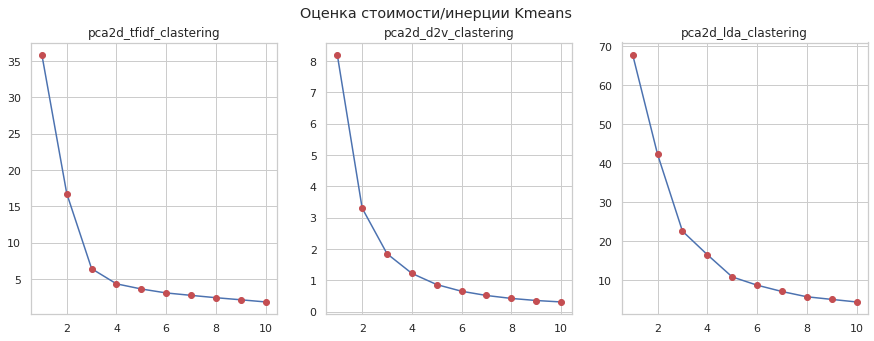

In [62]:
n_clusters = 10

fig, ax = pyplot.subplots(1, len(data_clustering), figsize=(15, 5))
fig.suptitle('Оценка стоимости/инерции Kmeans')
for i, data in enumerate(pca_2d_clustering.items()):
    k_inertia = []
    for clusters in range(1, n_clusters+1):
        kmeans = KMeans(n_clusters=clusters, random_state=seed).fit(data[1])
        k_inertia.append(kmeans.inertia_)
    ax[i].plot(range(1, n_clusters+1), k_inertia, label=data[0])
    ax[i].plot(range(1, n_clusters+1), k_inertia, 'ro')
    ax[i].set_title(data[0])
pyplot.show()

Для разбиения на кластеры выберем 3 и 4 кластера на всех трех представлениях

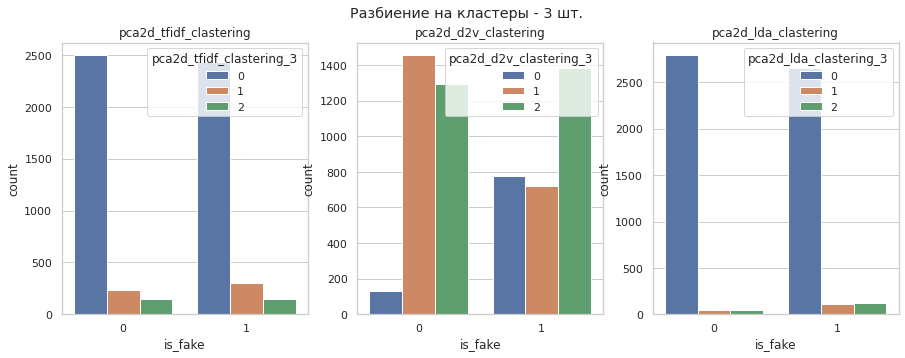

In [63]:
n_clusters = 3
fig, ax = pyplot.subplots(1, len(data_clustering), figsize=(15, 5))
fig.suptitle(f'Разбиение на кластеры - {n_clusters} шт.')
for i, data in enumerate(pca_2d_clustering.items()):
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed).fit(data[1])
    df[data[0]+'_'+str(n_clusters)] = kmeans.labels_
    sns.countplot(ax=ax[i], x="is_fake", hue=data[0]+'_'+str(n_clusters), data=df)
    ax[i].set_title(data[0])
pyplot.show()

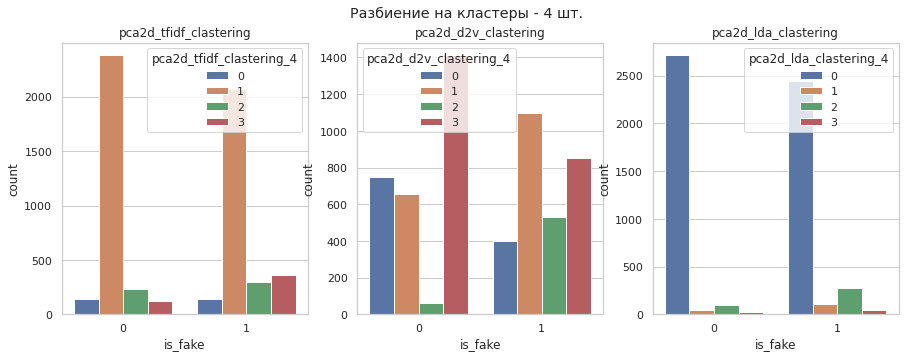

In [64]:
n_clusters = 4
fig, ax = pyplot.subplots(1, len(data_clustering), figsize=(15, 5))
fig.suptitle(f'Разбиение на кластеры - {n_clusters} шт.')
for i, data in enumerate(pca_2d_clustering.items()):
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed).fit(data[1])
    df[data[0]+'_'+str(n_clusters)] = kmeans.labels_
    sns.countplot(ax=ax[i], x="is_fake", hue=data[0]+'_'+str(n_clusters), data=df)
    ax[i].set_title(data[0])
pyplot.show()

Можно воспользоваться результатом разбиения на:

3 (нулевой кластер существенно различается в фэйковых и правдивых заголовках) кластера векторного представления doc2vec

4 (третий кластер существенно различается в фэйковых и правдивых заголовках) кластера векторного представления doc2vec



In [65]:
kmeans_3_d2v = KMeans(n_clusters=3, random_state=seed).fit(pca_2d_clustering['pca2d_d2v_clastering'])
kmeans_4_d2v = KMeans(n_clusters=4, random_state=seed).fit(pca_2d_clustering['pca2d_d2v_clastering'])

In [66]:
kmeans_features = df[['tsne2d_tfidf_clastering_5',	'tsne2d_d2v_clastering_5', 'pca2d_d2v_clastering_3', 'pca2d_d2v_clastering_4']]
dbscan_features = df[['tsne2d_lda_clastering']]

Кластеры представляют из себя категориальные признаки. Выполним ohe.

In [67]:
kmeans_features = pd.get_dummies(kmeans_features, columns = kmeans_features.columns)
kmeans_features.head(2)

,tsne2d_tfidf_clastering_5_0,tsne2d_tfidf_clastering_5_1,tsne2d_tfidf_clastering_5_2,tsne2d_tfidf_clastering_5_3,tsne2d_tfidf_clastering_5_4,tsne2d_d2v_clastering_5_0,tsne2d_d2v_clastering_5_1,tsne2d_d2v_clastering_5_2,tsne2d_d2v_clastering_5_3,tsne2d_d2v_clastering_5_4,pca2d_d2v_clastering_3_0,pca2d_d2v_clastering_3_1,pca2d_d2v_clastering_3_2,pca2d_d2v_clastering_4_0,pca2d_d2v_clastering_4_1,pca2d_d2v_clastering_4_2,pca2d_d2v_clastering_4_3
0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1


In [68]:
dbscan_features = pd.get_dummies(dbscan_features, columns = dbscan_features.columns)
dbscan_features.head(2)

,tsne2d_lda_clastering_-1,tsne2d_lda_clastering_0,tsne2d_lda_clastering_1,tsne2d_lda_clastering_2,tsne2d_lda_clastering_3,tsne2d_lda_clastering_4,tsne2d_lda_clastering_5,tsne2d_lda_clastering_6,tsne2d_lda_clastering_7,tsne2d_lda_clastering_8,...,tsne2d_lda_clastering_68,tsne2d_lda_clastering_69,tsne2d_lda_clastering_70,tsne2d_lda_clastering_71,tsne2d_lda_clastering_72,tsne2d_lda_clastering_73,tsne2d_lda_clastering_74,tsne2d_lda_clastering_75,tsne2d_lda_clastering_76,tsne2d_lda_clastering_77
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model research
Based on https://habr.com/ru/post/475552/

Исследуем 4 подготовленных набора данных и различные способы нормализации этих данных данных:
1. Векторное представление заголовков (lda_features, d2v_features, tfidf_features). Выберем один набор данных, показывающий более высокую метрику качества, и продолжим работу с ним.
2. Векторное представление + признаки разведочного анализа (eda_features)
3. Векторное представление + признаки кластерного анализа (kmeans_features, dbscan_features)
4. Векторное представление + признаки кластерного анализа (kmeans_features, dbscan_features) + признаки разведочного анализа (eda_features)

PS: Я понимаю что это метод "бить из пушки по воробьям" и все же мне бы хотелось в результате не только метрику качества поднять, но и получить хоть немного интуиции в алгоритмах.

## Features selection


### Выбор векторизации из tfidf_features, d2v_features, lda_features

In [69]:
X_tfidf = tfidf_features
X_d2v = d2v_features
X_lda = lda_features
X_datasets = {'tfidf': X_tfidf, 'd2v': X_d2v, 'lda': X_lda}

y = df['is_fake']

In [70]:
num_folds = 5
n_estimators = 100
scoring = 'f1'

#### Without normalization

In [92]:
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('LSVC', LinearSVC(random_state=seed)))
models.append(('SVC', SVC(random_state=seed)))
models.append(('MLP', MLPClassifier(random_state=seed)))
models.append(('BG', BaggingClassifier(n_estimators=n_estimators, random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=n_estimators, random_state=seed)))
models.append(('ET', ExtraTreesClassifier(n_estimators=n_estimators, random_state=seed)))
models.append(('AB', AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME', random_state=seed)))
models.append(('GB', GradientBoostingClassifier(n_estimators=n_estimators, random_state=seed)))

In [ ]:
names = []
results = []
for X in X_datasets.items():
    print('Dataset:', X[0])
    for name, model in models:
        try:
            kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
            cv_results = cross_validate(model, X[1], y, cv=kfold, scoring=scoring, return_train_score=True)
            names.append(name+'_'+X[0])
            results.append(cv_results)
            print(name, ': train_score =', cv_results['train_score'].mean(), 'test_score =', cv_results['test_score'].mean())
        except:
            print('Error:', name, X[0])

Dataset: tfidf
LR : train_score = 0.9586342736075715 test_score = 0.8346477330801347
LDA : train_score = 0.9694708580325336 test_score = 0.6564057097519649
KNN : train_score = 0.8781903276835843 test_score = 0.7901144296457342
CART : train_score = 1.0 test_score = 0.7568478653033752
NB : train_score = 0.981644201827779 test_score = 0.7856515006575634
LSVC : train_score = 0.9992175853291515 test_score = 0.8364819529251759
SVC : train_score = 0.9989133021228405 test_score = 0.8438539596645226
MLP : train_score = 1.0 test_score = 0.8408812932115216
BG : train_score = 0.9998262172201228 test_score = 0.7672678538937652
RF : train_score = 0.9999566066391843 test_score = 0.7787719862414114
ET : train_score = 1.0 test_score = 0.7996699177590313
AB : train_score = 0.3710588439198259 test_score = 0.354394053013217
GB : train_score = 0.7376655695537784 test_score = 0.65703209813692
Dataset: d2v
LR : train_score = 0.6356948541351539 test_score = 0.6343246763630539
LDA : train_score = 0.64903920004

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLP : train_score = 0.6259929689938766 test_score = 0.616111086122672
BG : train_score = 1.0 test_score = 0.6034369264430344
RF : train_score = 1.0 test_score = 0.6020490016250954
ET : train_score = 1.0 test_score = 0.5995502341389987
AB : train_score = 0.5872370360020646 test_score = 0.5753480890986173
GB : train_score = 0.7414503712867195 test_score = 0.6120725259735809
Dataset: lda
LR : train_score = 0.6338242181319338 test_score = 0.6101522331855816
LDA : train_score = 0.7638463627002947 test_score = 0.7494937566979123
KNN : train_score = 0.7243996302585469 test_score = 0.585332633353141
CART : train_score = 0.9984779530084147 test_score = 0.6032307638925821
NB : train_score = 0.630441539485283 test_score = 0.5978971071077416
LSVC : train_score = 0.659208105805821 test_score = 0.6339682625939299
SVC : train_score = 0.7183556092842693 test_score = 0.5900958806848521


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

MLP : train_score = 0.8198431817020572 test_score = 0.6343877412142719
BG : train_score = 0.998435564146047 test_score = 0.66110873538696
RF : train_score = 0.9984790894220259 test_score = 0.6613401200443955
ET : train_score = 0.9984779530084147 test_score = 0.648128867320072
AB : train_score = 0.6610234065012647 test_score = 0.6363741554918249
GB : train_score = 0.7482846736179258 test_score = 0.663892958246828


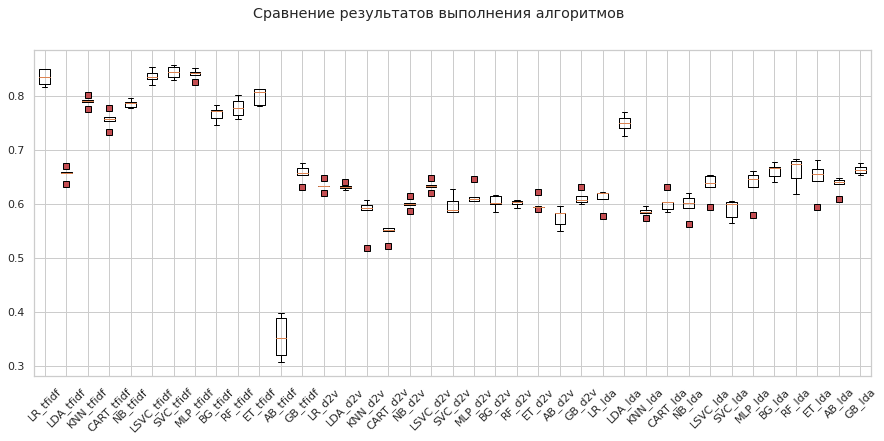

In [ ]:
# ящик с усами
results_test_score = [i['test_score'] for i in results]

fig = pyplot.figure(figsize=(15, 6))
fig.suptitle('Сравнение результатов выполнения алгоритмов')
ax = fig.add_subplot(111)
red_square = dict(markerfacecolor='r', marker='s')
pyplot.boxplot(results_test_score, flierprops=red_square)
ax.set_xticklabels(names, rotation=45)
pyplot.show()

#### Standard Scaler

In [93]:
# Стандартизация исходных данных (функция StandardScaler)
pipelines = []
pipelines.append(('SS_LR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(random_state=seed))])))
pipelines.append(('SS_LDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('SS_KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('SS_CART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier(random_state=seed))])))
pipelines.append(('SS_NB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('SS_LSVC', Pipeline([('Scaler', StandardScaler()), ('LSVC', LinearSVC(random_state=seed))])))
pipelines.append(('SS_SVC', Pipeline([('Scaler', StandardScaler()), ('SVC', SVC(random_state=seed))])))
pipelines.append(('SS_MLP', Pipeline([('Scaler', StandardScaler()), ('MLP', MLPClassifier(random_state=seed))])))
pipelines.append(('SS_BG', Pipeline([('Scaler', StandardScaler()), ('BG', BaggingClassifier(n_estimators=n_estimators, random_state=seed))])))
pipelines.append(('SS_RF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier(n_estimators=n_estimators, random_state=seed))])))                                                                                                                                                        
pipelines.append(('SS_ET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesClassifier(n_estimators=n_estimators, random_state=seed))])))
pipelines.append(('SS_AB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME', random_state=seed))])))
pipelines.append(('SS_GB', Pipeline([('Scaler', StandardScaler()), ('GB', GradientBoostingClassifier(n_estimators=n_estimators, random_state=seed))])))

In [ ]:
# Оценивание эффективности выполнения каждого алгоритма
names_SS = []
results_SS = []
for X in X_datasets.items():
    print('Dataset:', X[0])
    for name, model in pipelines:
        try:
            kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
            cv_results_SS = cross_validate(model, X[1], y, cv=kfold, scoring=scoring, return_train_score=True)
            names_SS.append(name+'_'+X[0])
            results_SS.append(cv_results_SS)
            print(name, ': train_score =', cv_results_SS['train_score'].mean(), 'test_score =', cv_results_SS['test_score'].mean())
        except:
            print('Error:', name, X[0])

Dataset: tfidf
SS_LR : train_score = 1.0 test_score = 0.8288445588992825
SS_LDA : train_score = 0.9694708580325336 test_score = 0.6564057097519649
SS_KNN : train_score = 0.8660761666220769 test_score = 0.6376323871789082
SS_CART : train_score = 1.0 test_score = 0.7485469329837946
SS_NB : train_score = 0.981554451282002 test_score = 0.7635439953383292


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SS_LSVC : train_score = 1.0 test_score = 0.8177592746704416
SS_SVC : train_score = 0.9965147737187152 test_score = 0.7940797401628712
SS_MLP : train_score = 1.0 test_score = 0.7867878995961101
SS_BG : train_score = 0.9999563032554075 test_score = 0.775744779339947
SS_RF : train_score = 0.9999566630552547 test_score = 0.7874704533421645
SS_ET : train_score = 1.0 test_score = 0.8009738147014376
SS_AB : train_score = 0.3710588439198259 test_score = 0.354394053013217
SS_GB : train_score = 0.7377654775747391 test_score = 0.6634119840601541
Dataset: d2v
SS_LR : train_score = 0.6503534661098443 test_score = 0.6347993902315286
SS_LDA : train_score = 0.6490392000423242 test_score = 0.632387718586393
SS_KNN : train_score = 0.7333089080980983 test_score = 0.5956267461394141
SS_CART : train_score = 1.0 test_score = 0.5527427284081
SS_NB : train_score = 0.6026021067640721 test_score = 0.6005883392530981


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SS_LSVC : train_score = 0.6485254142674302 test_score = 0.629715051363746
SS_SVC : train_score = 0.7096599566276975 test_score = 0.6026496249143621


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

SS_MLP : train_score = 0.9926049076792998 test_score = 0.5651117407959882
SS_BG : train_score = 1.0 test_score = 0.6043980526109243
SS_RF : train_score = 1.0 test_score = 0.6046949854913599
SS_ET : train_score = 1.0 test_score = 0.6036769853140886
SS_AB : train_score = 0.5872370360020646 test_score = 0.5753480890986173
SS_GB : train_score = 0.7427960759189368 test_score = 0.6157758326220671
Dataset: lda
SS_LR : train_score = 0.7581075648129356 test_score = 0.7454494408196319
SS_LDA : train_score = 0.7638463627002947 test_score = 0.7494937566979123
SS_KNN : train_score = 0.721492834066932 test_score = 0.5800287885615486
SS_CART : train_score = 0.9988695145651161 test_score = 0.6042098597590874
SS_NB : train_score = 0.630441539485283 test_score = 0.5978971071077416


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SS_LSVC : train_score = 0.7621102212736615 test_score = 0.7477127827624164
SS_SVC : train_score = 0.7201973194125265 test_score = 0.5941362120583097


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

SS_MLP : train_score = 0.9858815627075492 test_score = 0.6329293139070266
SS_BG : train_score = 0.9988262736819745 test_score = 0.6552537409082223
SS_RF : train_score = 0.9988698366789789 test_score = 0.6650862622322642
SS_ET : train_score = 0.9988695145651161 test_score = 0.6410562697131323
SS_AB : train_score = 0.6541677732595484 test_score = 0.6287538053999022
SS_GB : train_score = 0.7517586812034086 test_score = 0.6632962170603588


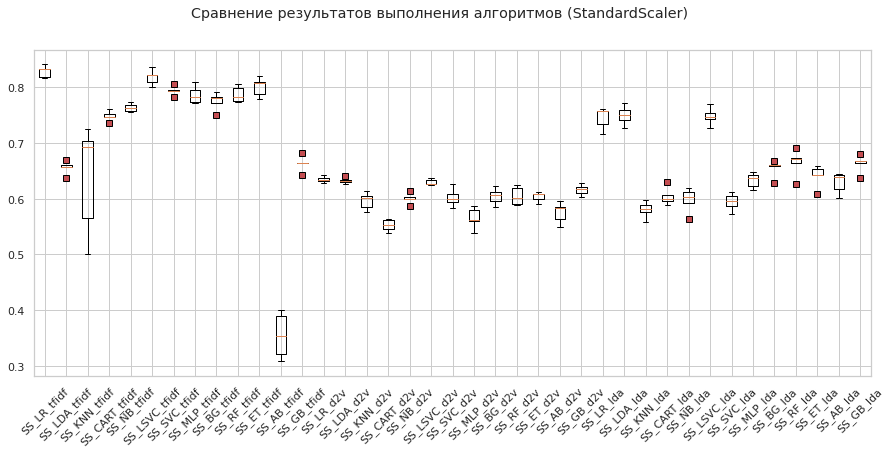

In [ ]:
# ящик с усами (StandardScaler)
results_SS_test_score = [i['test_score'] for i in results_SS]

fig = pyplot.figure(figsize=(15, 6))
fig.suptitle('Сравнение результатов выполнения алгоритмов (StandardScaler)')
ax = fig.add_subplot(111)
red_square = dict(markerfacecolor='r', marker='s')
pyplot.boxplot(results_SS_test_score, flierprops=red_square)
ax.set_xticklabels(names_SS, rotation=45)
pyplot.show()

#### MinMaxScaler

In [94]:
# Масштабирование исходных данных в диапазон (0,1) (функция MinMaxScaler)
pipelines = []
pipelines.append(('MMS_LR', Pipeline([('Scaler', MinMaxScaler()), ('LR', LogisticRegression(random_state=seed))])))
pipelines.append(('MMS_LDA', Pipeline([('Scaler', MinMaxScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('MMS_KNN', Pipeline([('Scaler', MinMaxScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('MMS_CART', Pipeline([('Scaler', MinMaxScaler()), ('CART', DecisionTreeClassifier(random_state=seed))])))
pipelines.append(('MMS_NB', Pipeline([('Scaler', MinMaxScaler()), ('NB', GaussianNB())])))
pipelines.append(('MMS_LSVC', Pipeline([('Scaler', MinMaxScaler()), ('LSVC', LinearSVC(random_state=seed))])))
pipelines.append(('MMS_SVC', Pipeline([('Scaler', MinMaxScaler()), ('SVC', SVC(random_state=seed))])))
pipelines.append(('MMS_MLP', Pipeline([('Scaler', MinMaxScaler()), ('MLP', MLPClassifier(random_state=seed))])))
pipelines.append(('MMS_BG', Pipeline([('Scaler', MinMaxScaler()), ('BG', BaggingClassifier(n_estimators=n_estimators, random_state=seed))])))
pipelines.append(('MMS_RF', Pipeline([('Scaler', MinMaxScaler()), ('RF', RandomForestClassifier(n_estimators=n_estimators, random_state=seed))])))
pipelines.append(('MMS_ET', Pipeline([('Scaler', MinMaxScaler()), ('ET', ExtraTreesClassifier(n_estimators=n_estimators, random_state=seed))])))
pipelines.append(('MMS_AB', Pipeline([('Scaler', MinMaxScaler()), ('AB', AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME', random_state=seed))])))
pipelines.append(('MMS_GB', Pipeline([('Scaler', MinMaxScaler()), ('GB', GradientBoostingClassifier(n_estimators=n_estimators, random_state=seed))])))

In [ ]:
# Оценивание эффективности выполнения каждого алгоритма
names_MMS = []
results_MMS = []
for X in X_datasets.items():
    print('Dataset:', X[0])
    for name, model in pipelines:
        try:
            kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
            cv_results_MMS = cross_validate(model, X[1], y, cv=kfold, scoring=scoring, return_train_score=True)
            names_MMS.append(name+'_'+X[0])
            results_MMS.append(cv_results_MMS)
            print(name, ': train_score =', cv_results_MMS['train_score'].mean(), 'test_score =', cv_results_MMS['test_score'].mean())
        except:
            print('Error:', name, X[0])

Dataset: tfidf
MMS_LR : train_score = 0.991833649207001 test_score = 0.8397298887944811
MMS_LDA : train_score = 0.9694708580325336 test_score = 0.6564057097519649
MMS_KNN : train_score = 0.7097630560828101 test_score = 0.6854499139448861
MMS_CART : train_score = 1.0 test_score = 0.750441386174767
MMS_NB : train_score = 0.981644201827779 test_score = 0.7856188417540169
MMS_LSVC : train_score = 1.0 test_score = 0.8246777859201666
MMS_SVC : train_score = 0.9899812983116376 test_score = 0.6567006405638872
MMS_MLP : train_score = 1.0 test_score = 0.8404730558579496
MMS_BG : train_score = 0.9999133448873483 test_score = 0.7732063040401986
MMS_RF : train_score = 1.0 test_score = 0.7778255039162231
MMS_ET : train_score = 1.0 test_score = 0.8026284782095189
MMS_AB : train_score = 0.3710588439198259 test_score = 0.354394053013217
MMS_GB : train_score = 0.7278475534869754 test_score = 0.6551482972696336
Dataset: d2v


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


MMS_LR : train_score = 0.6554936224756722 test_score = 0.6375049336107261
MMS_LDA : train_score = 0.6551234083029509 test_score = 0.6338127268097191
MMS_KNN : train_score = 0.7293037965754612 test_score = 0.5784412130336964
MMS_CART : train_score = 1.0 test_score = 0.5742511510553738
MMS_NB : train_score = 0.6130257917036163 test_score = 0.6138824166598346


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


MMS_LSVC : train_score = 0.6554432431618097 test_score = 0.6341601419439113
MMS_SVC : train_score = 0.712828046771598 test_score = 0.6145239643073541


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MMS_MLP : train_score = 0.6515783596003218 test_score = 0.6188714354975845
MMS_BG : train_score = 1.0 test_score = 0.6226442207794574
MMS_RF : train_score = 1.0 test_score = 0.6169662379787888
MMS_ET : train_score = 1.0 test_score = 0.616634708455414
MMS_AB : train_score = 0.5969820811827105 test_score = 0.5790660075885985
MMS_GB : train_score = 0.7394557944961877 test_score = 0.6113266198995368
Dataset: lda
MMS_LR : train_score = 0.6598743584517092 test_score = 0.6412362854351634
MMS_LDA : train_score = 0.766390462011446 test_score = 0.7567999108207062
MMS_KNN : train_score = 0.7301017562324936 test_score = 0.6009192410207129
MMS_CART : train_score = 0.9982608503557561 test_score = 0.6226921525387963
MMS_NB : train_score = 0.6383833000093032 test_score = 0.6132458861188665
MMS_LSVC : train_score = 0.6858659493717079 test_score = 0.6644249081053314
MMS_SVC : train_score = 0.7408395826871207 test_score = 0.6328158539448083


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

MMS_MLP : train_score = 0.8534859379756569 test_score = 0.6456792048446264
MMS_BG : train_score = 0.9981759560274435 test_score = 0.6775841091270308
MMS_RF : train_score = 0.9982635157776787 test_score = 0.6842606495577565
MMS_ET : train_score = 0.9982608503557561 test_score = 0.6616934368776985
MMS_AB : train_score = 0.6747083080206189 test_score = 0.6492096797260427
MMS_GB : train_score = 0.7659747137248984 test_score = 0.6953740191367355


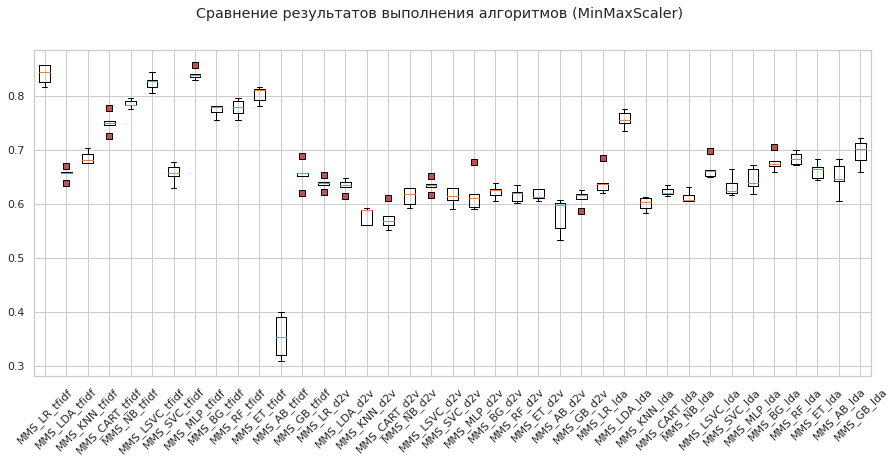

In [ ]:
# ящик с усами (MinMaxScaler)
results_MMS_test_score = [i['test_score'] for i in results_MMS]

fig = pyplot.figure(figsize=(15, 6))
fig.suptitle('Сравнение результатов выполнения алгоритмов (MinMaxScaler)')
ax = fig.add_subplot(111)
red_square = dict(markerfacecolor='r', marker='s')
pyplot.boxplot(results_MMS_test_score, flierprops=red_square)
ax.set_xticklabels(names_MMS, rotation=45)
pyplot.show()

#### Normalizer

In [95]:
# Нормализация исходных данных до единичной нормы (функция Normalizer)
pipelines = []
pipelines.append(('N_LR', Pipeline([('Scaler', Normalizer()), ('LR', LogisticRegression(random_state=seed))])))
pipelines.append(('N_LDA', Pipeline([('Scaler', Normalizer()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('N_KNN', Pipeline([('Scaler', Normalizer()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('N_CART', Pipeline([('Scaler', Normalizer()), ('CART', DecisionTreeClassifier(random_state=seed))])))
pipelines.append(('N_NB', Pipeline([('Scaler', Normalizer()), ('NB', GaussianNB())])))
pipelines.append(('N_LSVC', Pipeline([('Scaler', Normalizer()), ('LSVC', LinearSVC(random_state=seed))])))
pipelines.append(('N_SVC', Pipeline([('Scaler', Normalizer()), ('SVC', SVC(random_state=seed))])))
pipelines.append(('N_MLP', Pipeline([('Scaler', Normalizer()), ('MLP', MLPClassifier(random_state=seed))])))
pipelines.append(('N_BG', Pipeline([('Scaler', Normalizer()), ('BG', BaggingClassifier(n_estimators=n_estimators, random_state=seed))])))
pipelines.append(('N_RF', Pipeline([('Scaler', Normalizer()), ('RF', RandomForestClassifier(n_estimators=n_estimators, random_state=seed))])))
pipelines.append(('N_ET', Pipeline([('Scaler', Normalizer()), ('ET', ExtraTreesClassifier(n_estimators=n_estimators, random_state=seed))])))
pipelines.append(('N_AB', Pipeline([('Scaler', Normalizer()), ('AB', AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME', random_state=seed))])))
pipelines.append(('N_GB', Pipeline([('Scaler', Normalizer()), ('GB', GradientBoostingClassifier(n_estimators=n_estimators, random_state=seed))])))

In [ ]:
# Оценивание эффективности выполнения каждого алгоритма
names_N = []
results_N = []
for X in X_datasets.items():
    print('Dataset:', X[0])
    for name, model in pipelines:
        try:
            kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
            cv_results_N = cross_validate(model, X[1], y, cv=kfold, scoring=scoring, return_train_score=True)
            names_N.append(name+'_'+X[0])
            results_N.append(cv_results_N)
            print(name, ': train_score =', cv_results_N['train_score'].mean(), 'test_score =', cv_results_N['test_score'].mean())
        except:
            print('Error:', name, X[0])

Dataset: tfidf
N_LR : train_score = 0.9586342736075715 test_score = 0.8346477330801347
N_LDA : train_score = 0.9694708580325336 test_score = 0.6564057097519649
N_KNN : train_score = 0.878465567104237 test_score = 0.7904739588478631
N_CART : train_score = 1.0 test_score = 0.7549555467541291
N_NB : train_score = 0.981644201827779 test_score = 0.7856515006575634
N_LSVC : train_score = 0.9992175853291515 test_score = 0.8364819529251759
N_SVC : train_score = 0.9989133021228405 test_score = 0.8438539596645226
N_MLP : train_score = 1.0 test_score = 0.8399769292930802
N_BG : train_score = 0.9999566066391843 test_score = 0.7721139975270865
N_RF : train_score = 1.0 test_score = 0.7850389157281239
N_ET : train_score = 1.0 test_score = 0.8033249052210912
N_AB : train_score = 0.3710588439198259 test_score = 0.354394053013217
N_GB : train_score = 0.7312562695680963 test_score = 0.660542432042185
Dataset: d2v
N_LR : train_score = 0.6423799227463135 test_score = 0.6089346092883203
N_LDA : train_score 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

N_MLP : train_score = 0.8203369316345313 test_score = 0.6295042857070443
N_BG : train_score = 1.0 test_score = 0.5896856360164556
N_RF : train_score = 1.0 test_score = 0.5879821612537187
N_ET : train_score = 1.0 test_score = 0.6193106359621613
N_AB : train_score = 0.6749979309760363 test_score = 0.6300515883919027
N_GB : train_score = 0.781950316559637 test_score = 0.6300698447085405
Dataset: lda
N_LR : train_score = 0.6659541889923674 test_score = 0.6456308510224942
N_LDA : train_score = 0.6658088216489106 test_score = 0.6483073556408813
N_KNN : train_score = 0.699662924316909 test_score = 0.5388156729256407
N_CART : train_score = 0.9913715648343473 test_score = 0.590967537830552
N_NB : train_score = 0.63823450683262 test_score = 0.6190409655156408
N_LSVC : train_score = 0.6654687079816602 test_score = 0.6472954606041009
N_SVC : train_score = 0.7615303129440065 test_score = 0.6297361269459022


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

N_MLP : train_score = 0.8850269397199056 test_score = 0.6304266560760463
N_BG : train_score = 0.9913098055576969 test_score = 0.6471688831037958
N_RF : train_score = 0.9913976630430087 test_score = 0.6421867964872192
N_ET : train_score = 0.9913715648343473 test_score = 0.6325442634715827
N_AB : train_score = 0.6637205666763035 test_score = 0.6287721003396441
N_GB : train_score = 0.7463083399023059 test_score = 0.66410921550773


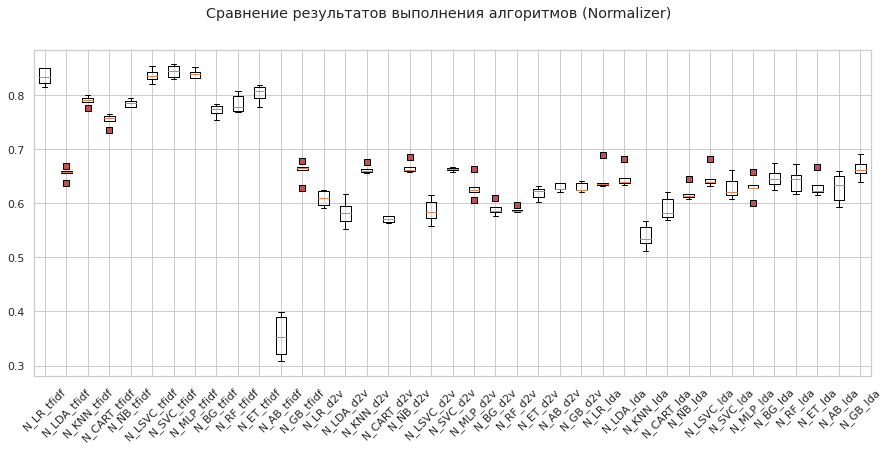

In [ ]:
# ящик с усами (Normalizer)
results_N_test_score = [i['test_score'] for i in results_N]

fig = pyplot.figure(figsize=(15, 6))
fig.suptitle('Сравнение результатов выполнения алгоритмов (Normalizer)')
ax = fig.add_subplot(111)
red_square = dict(markerfacecolor='r', marker='s')
pyplot.boxplot(results_N_test_score, flierprops=red_square)
ax.set_xticklabels(names_N, rotation=45)
pyplot.show()

Блиц-моделирование выявило в качестве предпочтений для дальнейшего исследования датасет tfidf. Продолжим исследование с ним.

Явными лидерами из тестировавшихся моделей выглядят LogisticRegression(), LinearSVC(), SVC(), MLPClassifier(), ExtraTreesClassifier(). Продолжим исследование с применением этих моделей.

### Оценка признаков eda_features, kmeans_features, dbscan_features

In [71]:
X_tfidf_eda = pd.concat([tfidf_features, eda_features], axis=1)
X_tfidf_km_dbscan = pd.concat([tfidf_features, kmeans_features, dbscan_features], axis=1)
X_tfidf_eda_km_dbscan = pd.concat([tfidf_features, eda_features, kmeans_features, dbscan_features], axis=1)

X_datasets_tfidf = {'eda': X_tfidf_eda, 
                    'km_dbscan': X_tfidf_km_dbscan, 
                    'eda_km_dbscan': X_tfidf_eda_km_dbscan,
                    }

#### Without normalization

In [96]:
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LSVC', LinearSVC(random_state=seed)))
models.append(('SVC', SVC(random_state=seed)))
models.append(('MLP', MLPClassifier(random_state=seed)))
models.append(('ET', ExtraTreesClassifier(n_estimators=n_estimators, random_state=seed)))

In [ ]:
names = []
results = []
for X in X_datasets_tfidf.items():
    print('Dataset:', X[0])
    for name, model in models:
        try:
            kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
            cv_results = cross_validate(model, X[1], y, cv=kfold, scoring=scoring, return_train_score=True)
            names.append(name+'_'+X[0])
            results.append(cv_results)
            print(name, ': train_score =', cv_results['train_score'].mean(), 'test_score =', cv_results['test_score'].mean())
        except:
            print('Error:', name, X[0])

Dataset: eda


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR : train_score = 0.801147709956686 test_score = 0.7864709378116598


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LSVC : train_score = 0.8286984161860109 test_score = 0.7532733256377633
SVC : train_score = 0.7376564687808925 test_score = 0.7368724344921052
MLP : train_score = 1.0 test_score = 0.8764446963609185
ET : train_score = 1.0 test_score = 0.8555346234738286
Dataset: km_dbscan


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR : train_score = 0.8985195636408279 test_score = 0.8102850095965561
LSVC : train_score = 0.999218234298386 test_score = 0.8459586714793005
SVC : train_score = 0.8311166266574903 test_score = 0.734639789466101
MLP : train_score = 1.0 test_score = 0.8508457845241122
ET : train_score = 1.0 test_score = 0.7873767165362441
Dataset: eda_km_dbscan


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR : train_score = 0.814479804324109 test_score = 0.7968952218892901


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LSVC : train_score = 0.8136851809995012 test_score = 0.7587771704065098
SVC : train_score = 0.7426985091668408 test_score = 0.741971672340536
MLP : train_score = 1.0 test_score = 0.8766309978061599
ET : train_score = 1.0 test_score = 0.8228348104493859


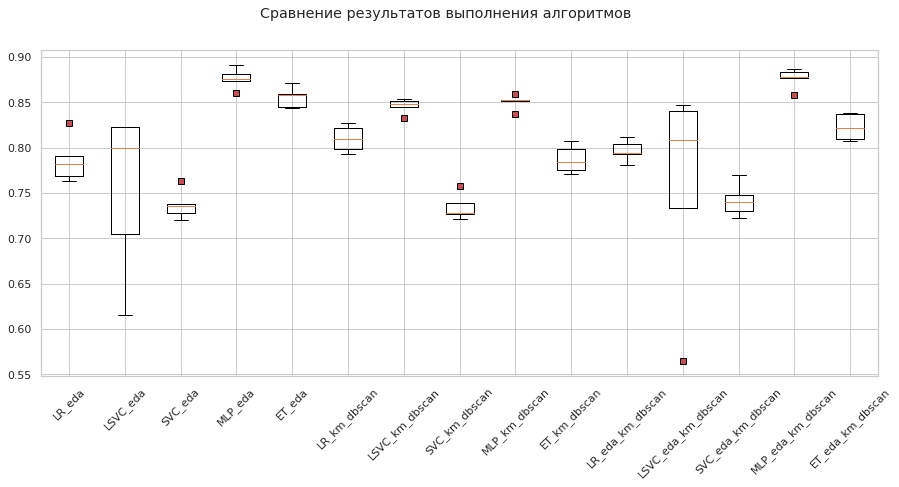

In [ ]:
# ящик с усами
results_test_score = [i['test_score'] for i in results]

fig = pyplot.figure(figsize=(15, 6))
fig.suptitle('Сравнение результатов выполнения алгоритмов')
ax = fig.add_subplot(111)
red_square = dict(markerfacecolor='r', marker='s')
pyplot.boxplot(results_test_score, flierprops=red_square)
ax.set_xticklabels(names, rotation=45)
pyplot.show()

#### Standard Scaler

In [97]:
# Стандартизация исходных данных (функция StandardScaler)
pipelines = []
pipelines.append(('SS_LR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(random_state=seed))])))
pipelines.append(('SS_LSVC', Pipeline([('Scaler', StandardScaler()), ('LSVC', LinearSVC(random_state=seed))])))
pipelines.append(('SS_SVC', Pipeline([('Scaler', StandardScaler()), ('SVC', SVC(random_state=seed))])))
pipelines.append(('SS_MLP', Pipeline([('Scaler', StandardScaler()), ('MLP', MLPClassifier(random_state=seed))])))
pipelines.append(('SS_ET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesClassifier(n_estimators=n_estimators, random_state=seed))])))

In [ ]:
# Оценивание эффективности выполнения каждого алгоритма
names_SS = []
results_SS = []
for X in X_datasets_tfidf.items():
    print('Dataset:', X[0])
    for name, model in pipelines:
        try:
            kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
            cv_results_SS = cross_validate(model, X[1], y, cv=kfold, scoring=scoring, return_train_score=True)
            names_SS.append(name+'_'+X[0])
            results_SS.append(cv_results_SS)
            print(name, ': train_score =', cv_results_SS['train_score'].mean(), 'test_score =', cv_results_SS['test_score'].mean())
        except:
            print('Error:', name, X[0])

Dataset: eda
SS_LR : train_score = 1.0 test_score = 0.8636402584519743


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SS_LSVC : train_score = 1.0 test_score = 0.8500067241973879
SS_SVC : train_score = 0.995770752855878 test_score = 0.8434278951489045
SS_MLP : train_score = 1.0 test_score = 0.8185788572914655
SS_ET : train_score = 1.0 test_score = 0.8555929674423579
Dataset: km_dbscan
SS_LR : train_score = 1.0 test_score = 0.8457516063678294


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SS_LSVC : train_score = 1.0 test_score = 0.8384060349914894
SS_SVC : train_score = 0.9969519923758969 test_score = 0.83089021067326
SS_MLP : train_score = 1.0 test_score = 0.79586627726518
SS_ET : train_score = 1.0 test_score = 0.7817340444652034
Dataset: eda_km_dbscan
SS_LR : train_score = 1.0 test_score = 0.8629741437322102


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SS_LSVC : train_score = 1.0 test_score = 0.8545028609324479
SS_SVC : train_score = 0.9959464387455116 test_score = 0.8558404602309053
SS_MLP : train_score = 1.0 test_score = 0.8006144615941884
SS_ET : train_score = 1.0 test_score = 0.8220965535266149


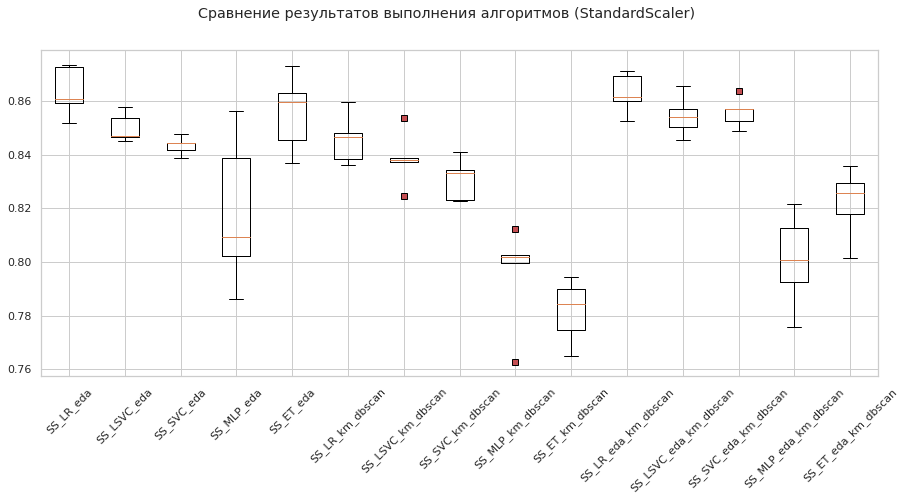

In [ ]:
# ящик с усами (StandardScaler)
results_SS_test_score = [i['test_score'] for i in results_SS]

fig = pyplot.figure(figsize=(15, 6))
fig.suptitle('Сравнение результатов выполнения алгоритмов (StandardScaler)')
ax = fig.add_subplot(111)
red_square = dict(markerfacecolor='r', marker='s')
pyplot.boxplot(results_SS_test_score, flierprops=red_square)
ax.set_xticklabels(names_SS, rotation=45)
pyplot.show()

#### MinMaxScaler

In [98]:
# Масштабирование исходных данных в диапазон (0,1) (функция MinMaxScaler)
pipelines = []
pipelines.append(('MMS_LR', Pipeline([('Scaler', MinMaxScaler()), ('LR', LogisticRegression(random_state=seed))])))
pipelines.append(('MMS_LSVC', Pipeline([('Scaler', MinMaxScaler()), ('LSVC', LinearSVC(random_state=seed))])))
pipelines.append(('MMS_SVC', Pipeline([('Scaler', MinMaxScaler()), ('SVC', SVC(random_state=seed))])))
pipelines.append(('MMS_MLP', Pipeline([('Scaler', MinMaxScaler()), ('MLP', MLPClassifier(random_state=seed))])))
pipelines.append(('MMS_ET', Pipeline([('Scaler', MinMaxScaler()), ('ET', ExtraTreesClassifier(n_estimators=n_estimators, random_state=seed))])))

In [ ]:
# Оценивание эффективности выполнения каждого алгоритма
names_MMS = []
results_MMS = []
for X in X_datasets_tfidf.items():
    print('Dataset:', X[0])
    for name, model in pipelines:
        try:
            kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
            cv_results_MMS = cross_validate(model, X[1], y, cv=kfold, scoring=scoring, return_train_score=True)
            names_MMS.append(name+'_'+X[0])
            results_MMS.append(cv_results_MMS)
            print(name, ': train_score =', cv_results_MMS['train_score'].mean(), 'test_score =', cv_results_MMS['test_score'].mean())
        except:
            print('Error:', name, X[0])

Dataset: eda
MMS_LR : train_score = 0.9858018624601101 test_score = 0.877765049305235
MMS_LSVC : train_score = 1.0 test_score = 0.869908887346905
MMS_SVC : train_score = 0.9867252132819546 test_score = 0.8338885373571923
MMS_MLP : train_score = 1.0 test_score = 0.8647538537755247
MMS_ET : train_score = 1.0 test_score = 0.8554089200298478
Dataset: km_dbscan


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


MMS_LR : train_score = 0.9862882167740518 test_score = 0.844036276771692
MMS_LSVC : train_score = 1.0 test_score = 0.8466279932307025
MMS_SVC : train_score = 0.9727787973665729 test_score = 0.7808099454069103
MMS_MLP : train_score = 1.0 test_score = 0.8535222066740697
MMS_ET : train_score = 1.0 test_score = 0.7823957727035659
Dataset: eda_km_dbscan


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


MMS_LR : train_score = 0.9859465587104721 test_score = 0.8707621329059869
MMS_LSVC : train_score = 1.0 test_score = 0.870824066681234
MMS_SVC : train_score = 0.9752290515599997 test_score = 0.8395161303074797
MMS_MLP : train_score = 1.0 test_score = 0.865582954325761
MMS_ET : train_score = 1.0 test_score = 0.8230455406426245


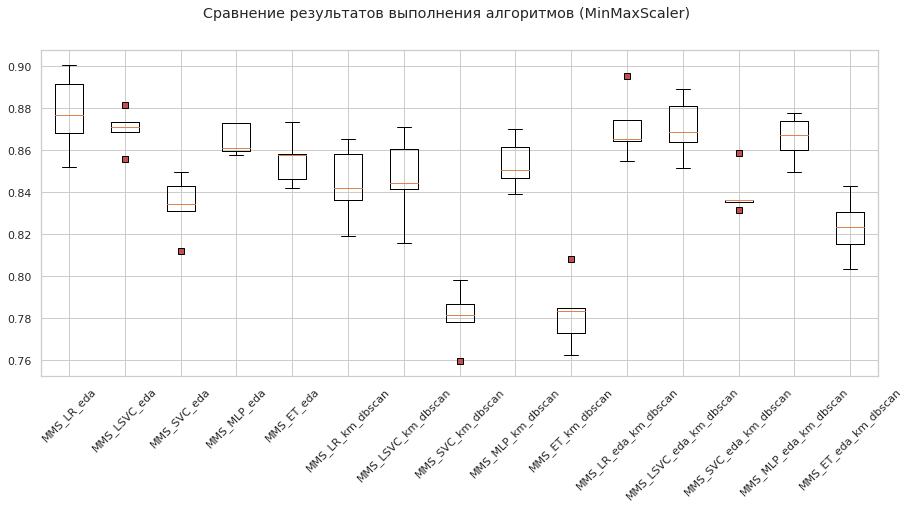

In [ ]:
# ящик с усами (MinMaxScaler)
results_MMS_test_score = [i['test_score'] for i in results_MMS]

fig = pyplot.figure(figsize=(15, 6))
fig.suptitle('Сравнение результатов выполнения алгоритмов (MinMaxScaler)')
ax = fig.add_subplot(111)
red_square = dict(markerfacecolor='r', marker='s')
pyplot.boxplot(results_MMS_test_score, flierprops=red_square)
ax.set_xticklabels(names_MMS, rotation=seed)
pyplot.show()

#### Normalizer

In [99]:
# Нормализация исходных данных до единичной нормы (функция Normalizer)
pipelines = []
pipelines.append(('N_LR', Pipeline([('Scaler', Normalizer()), ('LR', LogisticRegression(random_state=seed))])))
pipelines.append(('N_LSVC', Pipeline([('Scaler', Normalizer()), ('LSVC', LinearSVC(random_state=seed))])))
pipelines.append(('N_SVC', Pipeline([('Scaler', Normalizer()), ('SVC', SVC(random_state=seed))])))
pipelines.append(('N_MLP', Pipeline([('Scaler', Normalizer()), ('MLP', MLPClassifier(random_state=seed))])))
pipelines.append(('N_ET', Pipeline([('Scaler', Normalizer()), ('ET', ExtraTreesClassifier(n_estimators=n_estimators, random_state=seed))])))

In [ ]:
# Оценивание эффективности выполнения каждого алгоритма
names_N = []
results_N = []
for X in X_datasets_tfidf.items():
    print('Dataset:', X[0])
    for name, model in pipelines:
        try:
            kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
            cv_results_N = cross_validate(model, X[1], y, cv=kfold, scoring=scoring, return_train_score=True)
            names_N.append(name+'_'+X[0])
            results_N.append(cv_results_N)
            print(name, ': train_score =', cv_results_N['train_score'].mean(), 'test_score =', cv_results_N['test_score'].mean())
        except:
            print('Error:', name, X[0])

Dataset: eda
N_LR : train_score = 0.6283089045070143 test_score = 0.6231276088524387
N_LSVC : train_score = 0.6367266085480229 test_score = 0.6316842995117192
N_SVC : train_score = 0.6821119368680139 test_score = 0.681808969325178


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

N_MLP : train_score = 0.9952612921521272 test_score = 0.8559146301317002
N_ET : train_score = 1.0 test_score = 0.8380501603156987
Dataset: km_dbscan
N_LR : train_score = 0.7656491724241847 test_score = 0.7304528309350251
N_LSVC : train_score = 0.9461932399228218 test_score = 0.8265159475816889
N_SVC : train_score = 0.8342931004153809 test_score = 0.7195862686097783
N_MLP : train_score = 1.0 test_score = 0.8549700652054139
N_ET : train_score = 1.0 test_score = 0.7745237750353566
Dataset: eda_km_dbscan
N_LR : train_score = 0.7187974450258277 test_score = 0.7188855503373994
N_LSVC : train_score = 0.7448057531625714 test_score = 0.7448061920479789
N_SVC : train_score = 0.7347238535734966 test_score = 0.7304978536309374


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

N_MLP : train_score = 0.9953168533824119 test_score = 0.8706451926423823
N_ET : train_score = 1.0 test_score = 0.8290834395599859


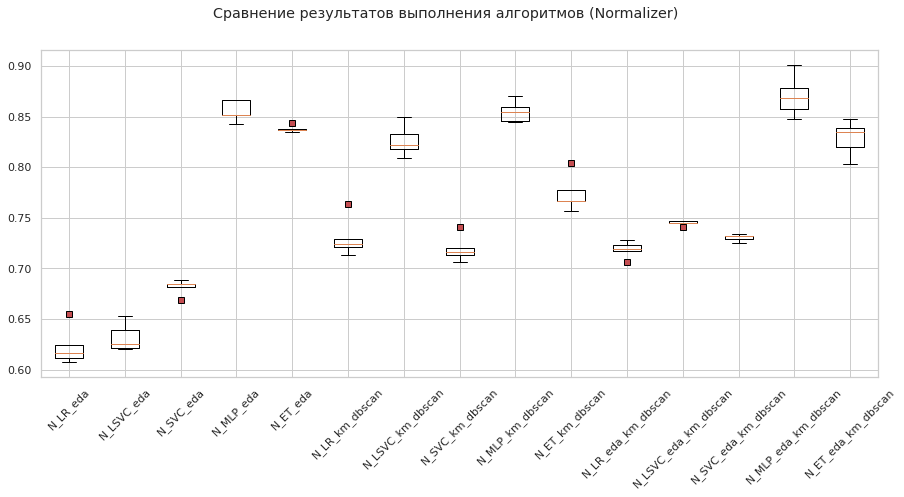

In [ ]:
# ящик с усами (Normalizer)
results_N_test_score = [i['test_score'] for i in results_N]

fig = pyplot.figure(figsize=(15, 6))
fig.suptitle('Сравнение результатов выполнения алгоритмов (Normalizer)')
ax = fig.add_subplot(111)
red_square = dict(markerfacecolor='r', marker='s')
pyplot.boxplot(results_N_test_score, flierprops=red_square)
ax.set_xticklabels(names_N, rotation=45)
pyplot.show()

### "Тонкая" настройка параметров модели с помощью GridSearchCV

Проводим "тюнинг" моделей MLPClassifier(), LogisticRegression() и SVC() с учетом ядра 'linear'

На наборе данных - X_tfidf_eda_km_dbscan и  X_tfidf_eda

С нормализацией:
* MLPClassifier() - без нормализации
*LogisticRegression() - MinMaxScaler()
*SVC() - без нормализации

In [ ]:
X = X_tfidf_eda_km_dbscan
y = df['is_fake']

#### MLPClassifier()

##### dataset X_tfidf_eda

In [ ]:
X = X_tfidf_eda
y = df['is_fake']

In [ ]:
PIPELINE = Pipeline([('scaler', None), ('estimator', MLPClassifier(random_state=seed))])
GRID = [
    {
     'estimator__solver': ['lbfgs', 'adam'],
     'estimator__hidden_layer_sizes': [(100,), (100, 100, 100), (200,),  (200, 200, 200),],
     'estimator__activation': ['logistic', 'tanh', 'relu'],
     }
]

gs_mlp = GridSearchCV(estimator=PIPELINE, 
                                 param_grid=GRID, 
                                 scoring=scoring, 
                                 cv=2, 
                                 refit=True, 
                                 verbose=2)
gs_mlp.fit(X, y)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100,), estimator__solver=lbfgs; total time= 3.1min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100,), estimator__solver=lbfgs; total time= 3.1min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100,), estimator__solver=adam; total time= 3.7min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100,), estimator__solver=adam; total time= 3.5min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=lbfgs; total time= 3.4min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=lbfgs; total time= 3.2min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=adam; total time= 1.4min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=adam; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200,), estimator__solver=lbfgs; total time= 5.1min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200,), estimator__solver=lbfgs; total time= 5.1min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200,), estimator__solver=adam; total time= 6.1min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200,), estimator__solver=adam; total time= 6.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=lbfgs; total time= 5.5min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=lbfgs; total time= 6.0min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=adam; total time= 2.3min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=adam; total time= 2.2min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100,), estimator__solver=lbfgs; total time= 3.0min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100,), estimator__solver=lbfgs; total time= 3.0min
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100,), estimator__solver=adam; total time= 2.1min
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100,), estimator__solver=adam; total time= 2.2min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=lbfgs; total time= 3.2min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=lbfgs; total time= 3.3min
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=adam; total time=  44.8s
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=adam; total time=  44.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200,), estimator__solver=lbfgs; total time= 5.1min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200,), estimator__solver=lbfgs; total time= 5.1min
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200,), estimator__solver=adam; total time= 3.5min
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200,), estimator__solver=adam; total time= 3.2min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=lbfgs; total time= 5.7min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=lbfgs; total time= 5.4min
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=adam; total time= 1.3min
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=adam; total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100,), estimator__solver=lbfgs; total time= 3.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100,), estimator__solver=lbfgs; total time= 3.3min
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100,), estimator__solver=adam; total time= 2.3min
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100,), estimator__solver=adam; total time= 2.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=lbfgs; total time= 3.5min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=lbfgs; total time= 3.5min
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=adam; total time=  48.1s
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=adam; total time=  49.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200,), estimator__solver=lbfgs; total time= 5.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200,), estimator__solver=lbfgs; total time= 5.6min
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200,), estimator__solver=adam; total time= 3.9min
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200,), estimator__solver=adam; total time= 3.8min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=lbfgs; total time= 5.7min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=lbfgs; total time= 6.0min
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=adam; total time= 1.5min
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=adam; total time= 1.4min


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('estimator',
                                        MLPClassifier(random_state=42))]),
             param_grid=[{'estimator__activation': ['logistic', 'tanh', 'relu'],
                          'estimator__hidden_layer_sizes': [(100,),
                                                            (100, 100, 100),
                                                            (200,),
                                                            (200, 200, 200)],
                          'estimator__solver': ['lbfgs', 'adam']}],
             scoring='f1', verbose=2)

In [ ]:
gs_mlp.best_params_, gs_mlp.best_estimator_

({'estimator__activation': 'logistic',
  'estimator__hidden_layer_sizes': (200,),
  'estimator__solver': 'adam'},
 Pipeline(steps=[('scaler', None),
                 ('estimator',
                  MLPClassifier(activation='logistic', hidden_layer_sizes=(200,),
                                random_state=42))]))

In [ ]:
pd.DataFrame(gs_mlp.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
5,"{'estimator__activation': 'logistic', 'estimat...",0.872058,1
1,"{'estimator__activation': 'logistic', 'estimat...",0.870528,2
7,"{'estimator__activation': 'logistic', 'estimat...",0.869968,3
15,"{'estimator__activation': 'tanh', 'estimator__...",0.867582,4
3,"{'estimator__activation': 'logistic', 'estimat...",0.867372,5
23,"{'estimator__activation': 'relu', 'estimator__...",0.867157,6
11,"{'estimator__activation': 'tanh', 'estimator__...",0.866261,7
9,"{'estimator__activation': 'tanh', 'estimator__...",0.866210,8
21,"{'estimator__activation': 'relu', 'estimator__...",0.866014,9
19,"{'estimator__activation': 'relu', 'estimator__...",0.865616,10


##### dataset X_tfidf_eda_km_dbscan

In [ ]:
X = X_tfidf_eda_km_dbscan
y = df['is_fake']

In [ ]:
PIPELINE = Pipeline([('scaler', None), ('estimator', MLPClassifier(random_state=seed))])
GRID = [
    {
     'estimator__solver': ['lbfgs', 'adam'],
     'estimator__hidden_layer_sizes': [(100,), (100, 100, 100), (200,),  (200, 200, 200),],
     'estimator__activation': ['logistic', 'tanh', 'relu'],
     }
]

gs_mlp = GridSearchCV(estimator=PIPELINE, 
                                 param_grid=GRID, 
                                 scoring=scoring, 
                                 cv=2, 
                                 refit=True, 
                                 verbose=2)
gs_mlp.fit(X, y)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100,), estimator__solver=lbfgs; total time= 2.8min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100,), estimator__solver=lbfgs; total time= 2.9min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100,), estimator__solver=adam; total time= 3.8min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100,), estimator__solver=adam; total time= 3.5min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=lbfgs; total time= 3.0min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=lbfgs; total time= 3.0min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=adam; total time= 1.5min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=adam; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200,), estimator__solver=lbfgs; total time= 4.6min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200,), estimator__solver=lbfgs; total time= 4.9min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200,), estimator__solver=adam; total time= 5.8min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200,), estimator__solver=adam; total time= 5.5min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=lbfgs; total time= 5.2min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=lbfgs; total time= 5.3min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=adam; total time= 2.1min
[CV] END estimator__activation=logistic, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=adam; total time= 2.2min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100,), estimator__solver=lbfgs; total time= 2.7min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100,), estimator__solver=lbfgs; total time= 2.7min
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100,), estimator__solver=adam; total time= 1.9min
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100,), estimator__solver=adam; total time= 2.1min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=lbfgs; total time= 3.1min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=lbfgs; total time= 3.0min
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=adam; total time=  47.8s
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=adam; total time=  46.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200,), estimator__solver=lbfgs; total time= 4.7min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200,), estimator__solver=lbfgs; total time= 4.6min
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200,), estimator__solver=adam; total time= 2.8min
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200,), estimator__solver=adam; total time= 2.7min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=lbfgs; total time= 5.1min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=lbfgs; total time= 5.1min
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=adam; total time= 1.2min
[CV] END estimator__activation=tanh, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=adam; total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100,), estimator__solver=lbfgs; total time= 3.0min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100,), estimator__solver=lbfgs; total time= 3.2min
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100,), estimator__solver=adam; total time= 2.3min
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100,), estimator__solver=adam; total time= 2.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=lbfgs; total time= 3.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=lbfgs; total time= 3.4min
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=adam; total time=  47.9s
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(100, 100, 100), estimator__solver=adam; total time=  54.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200,), estimator__solver=lbfgs; total time= 4.9min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200,), estimator__solver=lbfgs; total time= 4.9min
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200,), estimator__solver=adam; total time= 3.2min
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200,), estimator__solver=adam; total time= 3.2min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=lbfgs; total time= 5.4min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=lbfgs; total time= 5.5min
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=adam; total time= 1.1min
[CV] END estimator__activation=relu, estimator__hidden_layer_sizes=(200, 200, 200), estimator__solver=adam; total time= 1.2min


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('estimator',
                                        MLPClassifier(random_state=42))]),
             param_grid=[{'estimator__activation': ['logistic', 'tanh', 'relu'],
                          'estimator__hidden_layer_sizes': [(100,),
                                                            (100, 100, 100),
                                                            (200,),
                                                            (200, 200, 200)],
                          'estimator__solver': ['lbfgs', 'adam']}],
             scoring='f1', verbose=2)

In [ ]:
gs_mlp.best_params_, gs_mlp.best_estimator_

({'estimator__activation': 'relu',
  'estimator__hidden_layer_sizes': (200, 200, 200),
  'estimator__solver': 'adam'},
 Pipeline(steps=[('scaler', None),
                 ('estimator',
                  MLPClassifier(hidden_layer_sizes=(200, 200, 200),
                                random_state=42))]))

In [ ]:
pd.DataFrame(gs_mlp.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
23,"{'estimator__activation': 'relu', 'estimator__...",0.868239,1
15,"{'estimator__activation': 'tanh', 'estimator__...",0.867839,2
17,"{'estimator__activation': 'relu', 'estimator__...",0.866110,3
21,"{'estimator__activation': 'relu', 'estimator__...",0.865665,4
1,"{'estimator__activation': 'logistic', 'estimat...",0.865486,5
19,"{'estimator__activation': 'relu', 'estimator__...",0.864899,6
7,"{'estimator__activation': 'logistic', 'estimat...",0.863875,7
11,"{'estimator__activation': 'tanh', 'estimator__...",0.863846,8
9,"{'estimator__activation': 'tanh', 'estimator__...",0.863512,9
5,"{'estimator__activation': 'logistic', 'estimat...",0.863185,10


#### LogisticRegression()

##### dataset X_tfidf_eda

In [ ]:
X = X_tfidf_eda
y = df['is_fake']

In [ ]:
PIPELINE = Pipeline([('scaler', MinMaxScaler()), ('estimator', LogisticRegression(random_state=seed))])
GRID = {
    # 'estimator': [LogisticRegression(random_state=seed)],
    # 'scaler': [MinMaxScaler(), StandardScaler()],
    'estimator__penalty': ['l1','l2',], 
    'estimator__C':[0.1, 1, 10, 20]
    }

gs_lr = GridSearchCV(estimator=PIPELINE, param_grid=GRID, scoring=scoring, cv=num_folds, refit=True, verbose=2)
gs_lr.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ............estimator__C=0.1, estimator__penalty=l1; total time=   2.7s
[CV] END ............estimator__C=0.1, estimator__penalty=l1; total time=   0.9s
[CV] END ............estimator__C=0.1, estimator__penalty=l1; total time=   0.9s
[CV] END ............estimator__C=0.1, estimator__penalty=l1; total time=   0.9s
[CV] END ............estimator__C=0.1, estimator__penalty=l1; total time=   0.9s
[CV] END ............estimator__C=0.1, estimator__penalty=l2; total time=   4.6s
[CV] END ............estimator__C=0.1, estimator__penalty=l2; total time=   5.1s
[CV] END ............estimator__C=0.1, estimator__penalty=l2; total time=   4.5s
[CV] END ............estimator__C=0.1, estimator__penalty=l2; total time=   4.3s
[CV] END ............estimator__C=0.1, estimator__penalty=l2; total time=   4.8s
[CV] END ..............estimator__C=1, estimator__penalty=l1; total time=   0.9s
[CV] END ..............estimator__C=1, estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=10, estimator__penalty=l2; total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=10, estimator__penalty=l2; total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=10, estimator__penalty=l2; total time=  11.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=10, estimator__penalty=l2; total time=  11.7s
[CV] END .............estimator__C=20, estimator__penalty=l1; total time=   0.9s
[CV] END .............estimator__C=20, estimator__penalty=l1; total time=   0.9s
[CV] END .............estimator__C=20, estimator__penalty=l1; total time=   0.9s
[CV] END .............estimator__C=20, estimator__penalty=l1; total time=   0.9s
[CV] END .............estimator__C=20, estimator__penalty=l1; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=20, estimator__penalty=l2; total time=  11.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=20, estimator__penalty=l2; total time=  11.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=20, estimator__penalty=l2; total time=  11.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=20, estimator__penalty=l2; total time=  11.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=20, estimator__penalty=l2; total time=  11.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('estimator',
                                        LogisticRegression(random_state=42))]),
             param_grid={'estimator__C': [0.1, 1, 10, 20],
                         'estimator__penalty': ['l1', 'l2']},
             scoring='f1', verbose=2)

In [ ]:
gs_lr.best_params_, gs_lr.best_estimator_

({'estimator__C': 1, 'estimator__penalty': 'l2'},
 Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('estimator', LogisticRegression(C=1, random_state=42))]))

In [ ]:
pd.DataFrame(gs_lr.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
3,"{'estimator__C': 1, 'estimator__penalty': 'l2'}",0.875389,1
5,"{'estimator__C': 10, 'estimator__penalty': 'l2'}",0.875241,2
7,"{'estimator__C': 20, 'estimator__penalty': 'l2'}",0.873227,3
1,"{'estimator__C': 0.1, 'estimator__penalty': 'l2'}",0.843391,4
0,"{'estimator__C': 0.1, 'estimator__penalty': 'l1'}",NaN,5
2,"{'estimator__C': 1, 'estimator__penalty': 'l1'}",NaN,6
4,"{'estimator__C': 10, 'estimator__penalty': 'l1'}",NaN,7
6,"{'estimator__C': 20, 'estimator__penalty': 'l1'}",NaN,8


##### dataset X_tfidf_eda_km_dbscan

In [ ]:
X = X_tfidf_eda_km_dbscan

y = df['is_fake']

In [ ]:
PIPELINE = Pipeline([('scaler', MinMaxScaler()), ('estimator', LogisticRegression(random_state=seed))])
GRID = {
    'estimator__penalty': ['l1','l2',], 
    'estimator__C':[0.1, 1, 10, 20]
    }

gs_lr = GridSearchCV(estimator=PIPELINE, param_grid=GRID, scoring=scoring, cv=num_folds, refit=True, verbose=2)
gs_lr.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ............estimator__C=0.1, estimator__penalty=l1; total time=   7.0s
[CV] END ............estimator__C=0.1, estimator__penalty=l1; total time=   2.2s
[CV] END ............estimator__C=0.1, estimator__penalty=l1; total time=   2.0s
[CV] END ............estimator__C=0.1, estimator__penalty=l1; total time=   2.2s
[CV] END ............estimator__C=0.1, estimator__penalty=l1; total time=   2.1s
[CV] END ............estimator__C=0.1, estimator__penalty=l2; total time=   7.8s
[CV] END ............estimator__C=0.1, estimator__penalty=l2; total time=   6.7s
[CV] END ............estimator__C=0.1, estimator__penalty=l2; total time=   6.1s
[CV] END ............estimator__C=0.1, estimator__penalty=l2; total time=   6.8s
[CV] END ............estimator__C=0.1, estimator__penalty=l2; total time=   6.2s
[CV] END ..............estimator__C=1, estimator__penalty=l1; total time=   0.9s
[CV] END ..............estimator__C=1, estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ..............estimator__C=1, estimator__penalty=l2; total time=  11.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ..............estimator__C=1, estimator__penalty=l2; total time=  11.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ..............estimator__C=1, estimator__penalty=l2; total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ..............estimator__C=1, estimator__penalty=l2; total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ..............estimator__C=1, estimator__penalty=l2; total time=  11.2s
[CV] END .............estimator__C=10, estimator__penalty=l1; total time=   0.9s
[CV] END .............estimator__C=10, estimator__penalty=l1; total time=   0.9s
[CV] END .............estimator__C=10, estimator__penalty=l1; total time=   0.9s
[CV] END .............estimator__C=10, estimator__penalty=l1; total time=   0.9s
[CV] END .............estimator__C=10, estimator__penalty=l1; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=10, estimator__penalty=l2; total time=  12.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=10, estimator__penalty=l2; total time=  11.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=10, estimator__penalty=l2; total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=10, estimator__penalty=l2; total time=  11.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=10, estimator__penalty=l2; total time=  11.6s
[CV] END .............estimator__C=20, estimator__penalty=l1; total time=   0.9s
[CV] END .............estimator__C=20, estimator__penalty=l1; total time=   0.9s
[CV] END .............estimator__C=20, estimator__penalty=l1; total time=   0.9s
[CV] END .............estimator__C=20, estimator__penalty=l1; total time=   0.9s
[CV] END .............estimator__C=20, estimator__penalty=l1; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=20, estimator__penalty=l2; total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=20, estimator__penalty=l2; total time=  11.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=20, estimator__penalty=l2; total time=  11.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=20, estimator__penalty=l2; total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............estimator__C=20, estimator__penalty=l2; total time=  11.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('estimator',
                                        LogisticRegression(random_state=42))]),
             param_grid={'estimator__C': [0.1, 1, 10, 20],
                         'estimator__penalty': ['l1', 'l2']},
             scoring='f1', verbose=2)

In [ ]:
gs_lr.best_params_, gs_lr.best_estimator_

({'estimator__C': 10, 'estimator__penalty': 'l2'},
 Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('estimator', LogisticRegression(C=10, random_state=42))]))

In [ ]:
pd.DataFrame(gs_lr.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
5,"{'estimator__C': 10, 'estimator__penalty': 'l2'}",0.869788,1
7,"{'estimator__C': 20, 'estimator__penalty': 'l2'}",0.869074,2
3,"{'estimator__C': 1, 'estimator__penalty': 'l2'}",0.865213,3
1,"{'estimator__C': 0.1, 'estimator__penalty': 'l2'}",0.825834,4
0,"{'estimator__C': 0.1, 'estimator__penalty': 'l1'}",NaN,5
2,"{'estimator__C': 1, 'estimator__penalty': 'l1'}",NaN,6
4,"{'estimator__C': 10, 'estimator__penalty': 'l1'}",NaN,7
6,"{'estimator__C': 20, 'estimator__penalty': 'l1'}",NaN,8


#### SVC()

##### dataset X_tfidf_eda

In [ ]:
X = X_tfidf_eda
y = df['is_fake']

In [ ]:
PIPELINE = Pipeline([('scaler', None), ('estimator', SVC(random_state=seed))])
GRID = {
    "estimator__C": [0.1, 1, 10], 
    "estimator__kernel": ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']} 

gs_svm = GridSearchCV(PIPELINE, GRID, scoring=scoring, cv=3, refit = True, verbose=2)
gs_svm.fit(X, y)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END .........estimator__C=0.1, estimator__kernel=linear; total time= 2.1min
[CV] END .........estimator__C=0.1, estimator__kernel=linear; total time= 1.9min
[CV] END .........estimator__C=0.1, estimator__kernel=linear; total time= 1.9min
[CV] END ...........estimator__C=0.1, estimator__kernel=poly; total time= 1.8min
[CV] END ...........estimator__C=0.1, estimator__kernel=poly; total time= 1.8min
[CV] END ...........estimator__C=0.1, estimator__kernel=poly; total time= 1.8min
[CV] END ............estimator__C=0.1, estimator__kernel=rbf; total time= 2.3min
[CV] END ............estimator__C=0.1, estimator__kernel=rbf; total time= 2.4min
[CV] END ............estimator__C=0.1, estimator__kernel=rbf; total time= 2.4min
[CV] END ........estimator__C=0.1, estimator__kernel=sigmoid; total time= 2.6min
[CV] END ........estimator__C=0.1, estimator__kernel=sigmoid; total time= 2.7min
[CV] END ........estimator__C=0.1, estimator__ke

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 217, in fit
    " Input is a {}x{} matrix.".format(X.shape[0], X.shape[1])
ValueError: Precomputed

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('estimator', SVC(random_state=42))]),
             param_grid={'estimator__C': [0.1, 1, 10],
                         'estimator__kernel': ['linear', 'poly', 'rbf',
                                               'sigmoid', 'precomputed']},
             scoring='f1', verbose=2)

In [ ]:
gs_svm.best_params_, gs_svm.best_estimator_

({'estimator__C': 1, 'estimator__kernel': 'linear'},
 Pipeline(steps=[('scaler', None),
                 ('estimator', SVC(C=1, kernel='linear', random_state=42))]))

In [ ]:
pd.DataFrame(gs_svm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
5,"{'estimator__C': 1, 'estimator__kernel': 'line...",0.867146,1
10,"{'estimator__C': 10, 'estimator__kernel': 'lin...",0.859098,2
0,"{'estimator__C': 0.1, 'estimator__kernel': 'li...",0.795858,3
11,"{'estimator__C': 10, 'estimator__kernel': 'poly'}",0.752046,4
12,"{'estimator__C': 10, 'estimator__kernel': 'rbf'}",0.742255,5
6,"{'estimator__C': 1, 'estimator__kernel': 'poly'}",0.740449,6
2,"{'estimator__C': 0.1, 'estimator__kernel': 'rbf'}",0.739446,7
1,"{'estimator__C': 0.1, 'estimator__kernel': 'po...",0.737832,8
7,"{'estimator__C': 1, 'estimator__kernel': 'rbf'}",0.736024,9
3,"{'estimator__C': 0.1, 'estimator__kernel': 'si...",0.307398,10


##### dataset X_tfidf_eda_km_dbscan

In [ ]:
X = X_tfidf_eda_km_dbscan
y = df['is_fake']

In [ ]:
PIPELINE = Pipeline([('scaler', None), ('estimator', SVC(random_state=seed))])
GRID = {
    "estimator__C": [0.1, 1, 10], 
    "estimator__kernel": ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']} 

gs_svm = GridSearchCV(PIPELINE, GRID, scoring=scoring, cv=3, refit = True, verbose=2)
gs_svm.fit(X, y)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END .........estimator__C=0.1, estimator__kernel=linear; total time= 1.8min
[CV] END .........estimator__C=0.1, estimator__kernel=linear; total time= 1.7min
[CV] END .........estimator__C=0.1, estimator__kernel=linear; total time= 1.7min
[CV] END ...........estimator__C=0.1, estimator__kernel=poly; total time= 1.8min
[CV] END ...........estimator__C=0.1, estimator__kernel=poly; total time= 1.9min
[CV] END ...........estimator__C=0.1, estimator__kernel=poly; total time= 1.9min
[CV] END ............estimator__C=0.1, estimator__kernel=rbf; total time= 2.4min
[CV] END ............estimator__C=0.1, estimator__kernel=rbf; total time= 2.4min
[CV] END ............estimator__C=0.1, estimator__kernel=rbf; total time= 2.4min
[CV] END ........estimator__C=0.1, estimator__kernel=sigmoid; total time= 2.7min
[CV] END ........estimator__C=0.1, estimator__kernel=sigmoid; total time= 2.7min
[CV] END ........estimator__C=0.1, estimator__ke

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 217, in fit
    " Input is a {}x{} matrix.".format(X.shape[0], X.shape[1])
ValueError: Precomputed

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('estimator', SVC(random_state=42))]),
             param_grid={'estimator__C': [0.1, 1, 10],
                         'estimator__kernel': ['linear', 'poly', 'rbf',
                                               'sigmoid', 'precomputed']},
             scoring='f1', verbose=2)

In [ ]:
gs_svm.best_params_, gs_svm.best_estimator_

({'estimator__C': 1, 'estimator__kernel': 'linear'},
 Pipeline(steps=[('scaler', None),
                 ('estimator', SVC(C=1, kernel='linear', random_state=42))]))

In [ ]:
pd.DataFrame(gs_svm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
5,"{'estimator__C': 1, 'estimator__kernel': 'line...",0.861085,1
10,"{'estimator__C': 10, 'estimator__kernel': 'lin...",0.858392,2
0,"{'estimator__C': 0.1, 'estimator__kernel': 'li...",0.811512,3
11,"{'estimator__C': 10, 'estimator__kernel': 'poly'}",0.767016,4
12,"{'estimator__C': 10, 'estimator__kernel': 'rbf'}",0.766792,5
6,"{'estimator__C': 1, 'estimator__kernel': 'poly'}",0.745175,6
2,"{'estimator__C': 0.1, 'estimator__kernel': 'rbf'}",0.740505,7
7,"{'estimator__C': 1, 'estimator__kernel': 'rbf'}",0.739528,8
1,"{'estimator__C': 0.1, 'estimator__kernel': 'po...",0.738642,9
3,"{'estimator__C': 0.1, 'estimator__kernel': 'si...",0.308624,10


# Резюме

Решаю остановиться на алгоритмее LogisticRegression() и наборе признаков X_tfidf_eda

Данное решение следует воспринимать как baseline-овое и, я уверен, можно добиться более высокого результата, применяя лучшие практики в NLP на основе BERT, LASER и наверняка есть что-то еще.

Признаки также можно расширить:
* возможностями pymorphy2 http://opencorpora.org/dict.php?act=gram (поздно обнаружил эти возможности)
* добавлением би-граммов, три-граммов и n-граммов

Беглым взглядом по заголовкам можно выделить явное присутствие юмора и сатиры в классифицированных как фейки. Дело за малым определить юмор с помощью алгоритмов :)


In [114]:
lr = LogisticRegression(random_state=seed)
lr.fit(X_tfidf_eda, df['is_fake'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

# Классификация на тестовых данных

In [115]:
df_test = pd.read_csv('test.tsv', sep='\t')
df_test.head()

,title,is_fake
0,Роскомнадзор представил реестр сочетаний цвето...,0
1,Ночью под Минском на президентской горе Белара...,0
2,Бывший спичрайтер Юрия Лозы рассказал о трудно...,0
3,"Сельская церковь, собравшая рекордно низкое ко...",0
4,Акции Google рухнули после объявления о переза...,0


In [116]:
df_test['tokens'] = df_test['title'].apply(tokens, args=(stopWords,))
df_test['tokens_lemm'] = df_test['tokens'].apply(tokens_lemm)
df_test['len_title'] = df_test['title'].apply(lambda x: len(x))
df_test['abbreviation'] = df_test['tokens'].apply(abbreviation)
df_test['name_in_title'] = df_test['title'].apply(name_in_title, args=(prob_thresh,))
df_test['exclamation_mark'] = df_test['title'].apply(lambda x: 1 if '!' in x else 0)
df_test['question_mark'] = df_test['title'].apply(lambda x: 1 if '?' in x else 0)
df_test['quotes'] = df_test['title'].apply(lambda x: 1 if '«' and '»' in x else 0)
df_test['colon'] = df_test['title'].apply(lambda x: 1 if ':' in x else 0)

eda_features_test = df_test[['len_title', 'abbreviation',
                             'exclamation_mark', 'question_mark', 
                             'quotes', 'colon', 'name_in_title',
                            ]]
df_test.head(2)

,title,is_fake,tokens,tokens_lemm,len_title,abbreviation,name_in_title,exclamation_mark,question_mark,quotes,colon
0,Роскомнадзор представил реестр сочетаний цвето...,0,"[Роскомнадзор, представил, реестр, сочетаний, ...","[роскомнадзор, представить, реестр, сочетание,...",71,0,0,0,0,0,0
1,Ночью под Минском на президентской горе Белара...,0,"[Ночью, Минском, президентской, горе, Беларашм...","[ночью, минский, президентский, гора, беларашм...",109,0,1,0,0,0,0


In [117]:
df_test['title_lemm'] = pd.DataFrame([[' '.join(x)] for x in df_test['tokens_lemm']])
tfidf.transform(df_test['title_lemm'])
tfidf_features_test = pd.DataFrame(tfidf.transform(df_test['title_lemm']).toarray(), columns=tfidf.get_feature_names())
tfidf_features_test.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,02м,08м,10,100,1000,101,1079,11,...,ярош,ярцев,ясный,ястреб,яхта,яценюк,яшин,ящик,ёлка,ёршик
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
X_tfidf_eda_test = pd.concat([tfidf_features_test, eda_features_test], axis=1)

In [119]:
is_fake_predict = lr.predict(X_tfidf_eda_test)

In [120]:
df_pred = pd.concat([df_test['title'], pd.DataFrame(is_fake_predict, columns=['is_fake'])], axis=1)

In [121]:
df_pred.to_csv('predictions.tsv', sep='\t')

# Литература

https://habr.com/ru/post/599513/ NLP алгоритмы для мониторинга и AIOps с использованием библиотек Python 

https://habr.com/ru/post/475552/ Блиц-проверка алгоритмов машинного обучения: скорми свой набор данных библиотеке scikit-learn

https://habr.com/ru/post/585838/ Семантика и технология Word2Vec

https://habr.com/ru/post/277563/ Word2Vec: классификация текстовых документов

https://pythobyte.com/implementing-word2vec-with-gensim-library-in-python-99811/ Реализация Word2Vec с библиотекой Gensim в Python

https://pymorphy2.readthedocs.io/en/stable/ Морфологический анализатор pymorphy2
